In [139]:
import sys
import os

sys.path.append(os.path.abspath('..'))

import numpy as np
import seaborn as sns
import pandas as pd
import commons as cmns
import matplotlib.pyplot as plt
from keras import *
from keras.callbacks import *
import os
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from commons import mean_absolute_percentage_error
import commons as cmns
from keras.layers import *
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier

# Manual Feature Selection

Based on correlation matrix and feature importance

In [2]:
final_datasets = {
    "interval1": {
        "1": pd.DataFrame(),
        "7": pd.DataFrame(),
        "30": pd.DataFrame(),
        "90": pd.DataFrame(),
    },
    "interval2": {
        "1": pd.DataFrame(),
        "7": pd.DataFrame(),
        "30": pd.DataFrame(),
        "90": pd.DataFrame(),
    },
    "interval3": {
        "1": pd.DataFrame(),
        "7": pd.DataFrame(),
        "30": pd.DataFrame(),
        "90": pd.DataFrame(),
    },
}

In [121]:
# Set up the matplotlib figure and show correlation matrix
def plot_correlation(df: pd.DataFrame) -> None:
    y = np.ravel(df["category"])
    df_aux = df.drop(columns=["category"], inplace=False)
    corr = df_aux.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(23, 15))
    sns.heatmap(corr,mask=mask, cmap='coolwarm',annot=True, fmt='.2f')
    plt.show()


def plot_feature_importance(df: pd.DataFrame):
    y = np.ravel(df["category"])
    df_aux = df.drop(columns=["category"], inplace=False)
    # Train final random forest with new subset
    rf_final=RandomForestClassifier(random_state=7,n_jobs=-1)
    rf_final.fit(df_aux,y)
    imp_feat=cmns.feature_importance(df_aux.columns,rf_final.feature_importances_)
    # cmns.plot_feature_importance(imp_feat,'feature importance')
    # plt.show()
    return imp_feat

## Interval 1

### 1 day

In [10]:
interval = "interval1"
period = "1"
df = pd.read_csv("./datasets/cls_interval1_1days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
0              activeaddresses3trx            0.031379
16            activeaddresses90var            0.026273
38           confirmationtime30ema            0.020996
22            confirmationtime3ema            0.024290
27            confirmationtime7wma            0.023727
36                 difficulty14std            0.021927
23                  difficulty7trx            0.024240
24                fee_to_rewardUSD            0.024139
9                    hashrate14mom            0.028099
7                    hashrate14roc            0.028402
20                   hashrate14trx            0.024830
12                   hashrate30roc            0.027405
32                   hashrate30trx            0.022256
5                     hashrate3mom            0.029555
29                    hashrate3std            0.023273
28                    hashrate3var            0.023529
14                    hashrate7mom            0.026570
37                    hashrate7std            0.021729
26                   hashrate90roc            0.023752
30       median_transaction_feeUSD            0.022450
18  mediantransactionvalue30wmaUSD            0.025081
2    mediantransactionvalue7rocUSD            0.030910
11  mediantransactionvalue90rsiUSD            0.027446
31       mediantransactionvalueUSD            0.022382
3         mining_profitability3roc            0.030442
34        mining_profitability3sma            0.022164
21        mining_profitability3wma            0.024694
13                   price30momUSD            0.027328
1                     price3rsiUSD            0.030974
33                        priceUSD            0.022207
25              sentbyaddress30std            0.023826
4                sentbyaddress7var            0.029577
35                    sentinusdUSD            0.022048
8                        size14var            0.028147
6                         size7rsi            0.028942
15                       size90mom            0.026478
17         transactionfees14rsiUSD            0.025605
10         transactionfees30rsiUSD            0.027860
19               transactions90std            0.025067

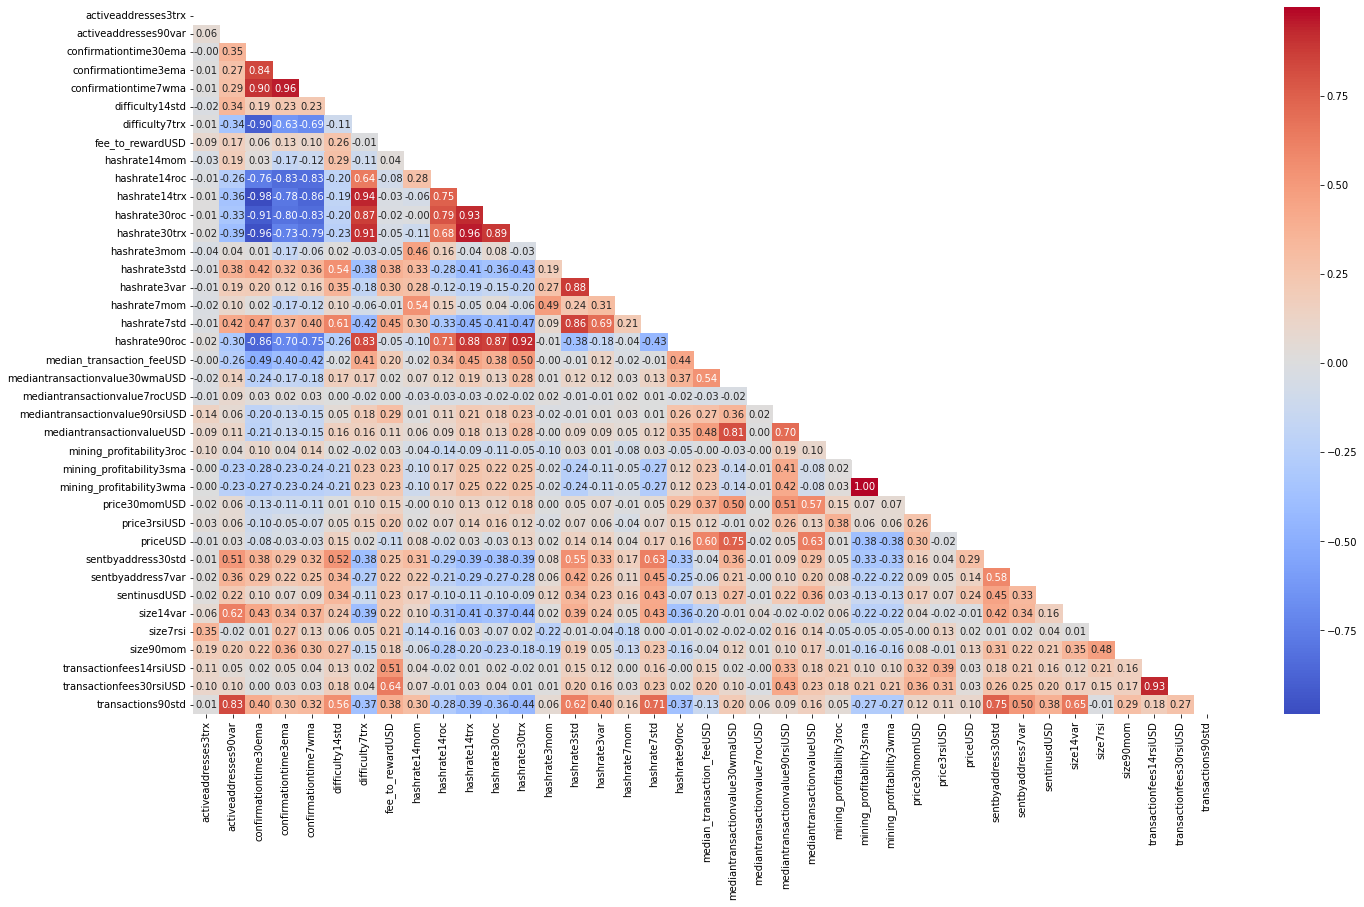

In [11]:
plot_correlation(df)


In [19]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'hashrate3var' at index: 15
dropping 'mining_profitability3wma' at index: 25
dropping 'hashrate30trx' at index: 12
dropping 'transactions90std' at index: 35
dropping 'hashrate14trx' at index: 10
dropping 'hashrate7std' at index: 14
dropping 'hashrate30roc' at index: 10
Remaining variables:
Index(['activeaddresses3trx', 'activeaddresses90var', 'confirmationtime30ema',
       'confirmationtime3ema', 'confirmationtime7wma', 'difficulty14std',
       'difficulty7trx', 'fee_to_rewardUSD', 'hashrate14mom', 'hashrate14roc',
       'hashrate3mom', 'hashrate3std', 'hashrate7mom', 'hashrate90roc',
       'median_transaction_feeUSD', 'mediantransactionvalue30wmaUSD',
       'mediantransactionvalue7rocUSD', 'mediantransactionvalue90rsiUSD',
       'mediantransactionvalueUSD', 'mining_profitability3roc',
       'mining_profitability3sma', 'price30momUSD', 'price3rsiUSD', 'priceUSD',
       'sentbyaddress30std', 'sentbyaddress7var', 'sentinusdUSD', 'size14var',
       'size7rsi', 'size90mom

feature  feature_importance
4              activeaddresses3trx            0.034596
1             activeaddresses90var            0.037529
20           confirmationtime30ema            0.029276
11            confirmationtime3ema            0.032243
14            confirmationtime7wma            0.031520
24                 difficulty14std            0.028606
23                  difficulty7trx            0.028646
16                fee_to_rewardUSD            0.030711
28                   hashrate14mom            0.027273
5                    hashrate14roc            0.034478
12                    hashrate3mom            0.031876
27                    hashrate3std            0.027967
25                    hashrate7mom            0.028525
19                   hashrate90roc            0.029773
29       median_transaction_feeUSD            0.026899
22  mediantransactionvalue30wmaUSD            0.028756
2    mediantransactionvalue7rocUSD            0.036613
13  mediantransactionvalue90rsiUSD            0.031522
30       mediantransactionvalueUSD            0.026422
9         mining_profitability3roc            0.033668
6         mining_profitability3sma            0.034158
10                   price30momUSD            0.032693
0                     price3rsiUSD            0.038366
26                        priceUSD            0.028101
15              sentbyaddress30std            0.031481
3                sentbyaddress7var            0.035609
31                    sentinusdUSD            0.025996
18                       size14var            0.029852
8                         size7rsi            0.033686
7                        size90mom            0.034125
17         transactionfees14rsiUSD            0.029934
21         transactionfees30rsiUSD            0.029100

1.0


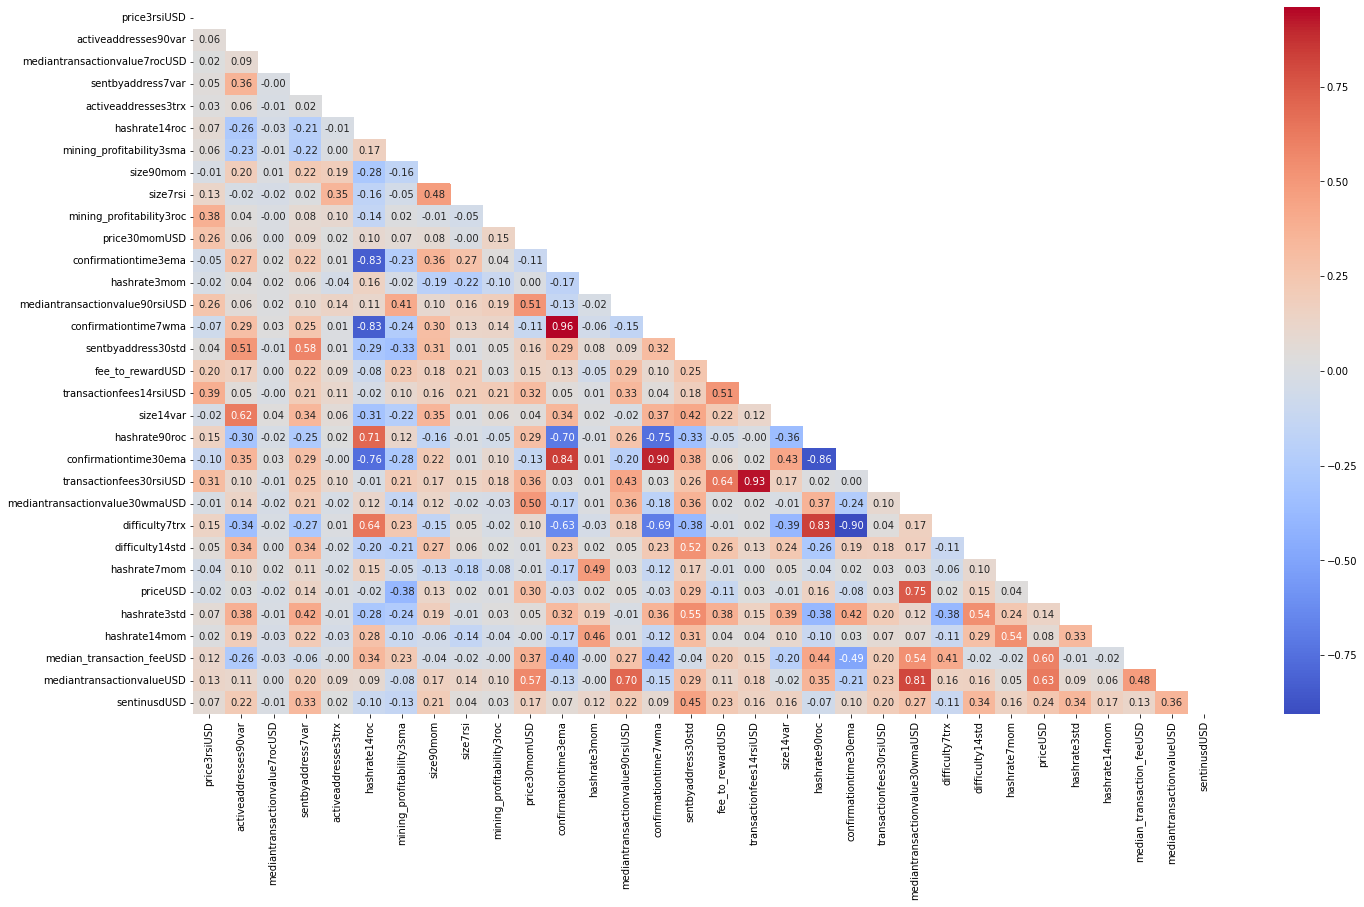

In [21]:
drop_cols_indices = [
    # 29, # hashrate3std
    # 30, # median_transaction_feeUSD
    # 34, # mining_profitability3sma
    # 17, # transactionfees14rsiUSD,
    # 26, # hashrate90roc
    # 32, # hashrate30trx
    # 38, # confirmationtime30ema
    # 27, # confirmationtime7wma
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 7 days

In [22]:
interval = "interval1"
period = "7"
df = pd.read_csv("./datasets/cls_interval1_7days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
0        activeaddresses30trx            0.044759
28            difficulty14wma            0.021081
29             difficulty7ema            0.020943
33              hashrate14std            0.020416
19              hashrate14var            0.024908
3   median_transaction_feeUSD            0.039459
24  mediantransactionvalueUSD            0.023313
27  mining_profitability14sma            0.021847
25  mining_profitability30sma            0.022770
18  mining_profitability30wma            0.025681
21   mining_profitability3sma            0.024422
26   mining_profitability3wma            0.022700
10   mining_profitability7sma            0.031528
35   mining_profitability7std            0.019086
30   mining_profitability7wma            0.020805
32  mining_profitability90ema            0.020464
2   mining_profitability90trx            0.039586
17              price14rsiUSD            0.025699
1               price30stdUSD            0.040864
8               price30varUSD            0.032874
34               price3rsiUSD            0.020298
23               price7rsiUSD            0.024349
5               price90smaUSD            0.036510
4                    priceUSD            0.037719
9           sentinusd90stdUSD            0.032533
6           sentinusd90varUSD            0.035434
31             top100cap14roc            0.020642
16             top100cap14trx            0.025989
13             top100cap30mom            0.027461
11             top100cap30roc            0.031007
14             top100cap30rsi            0.026515
20             top100cap90mom            0.024566
22             top100cap90roc            0.024422
15             top100cap90rsi            0.026316
7              top100cap90wma            0.033048
12     transactionfees7trxUSD            0.029985

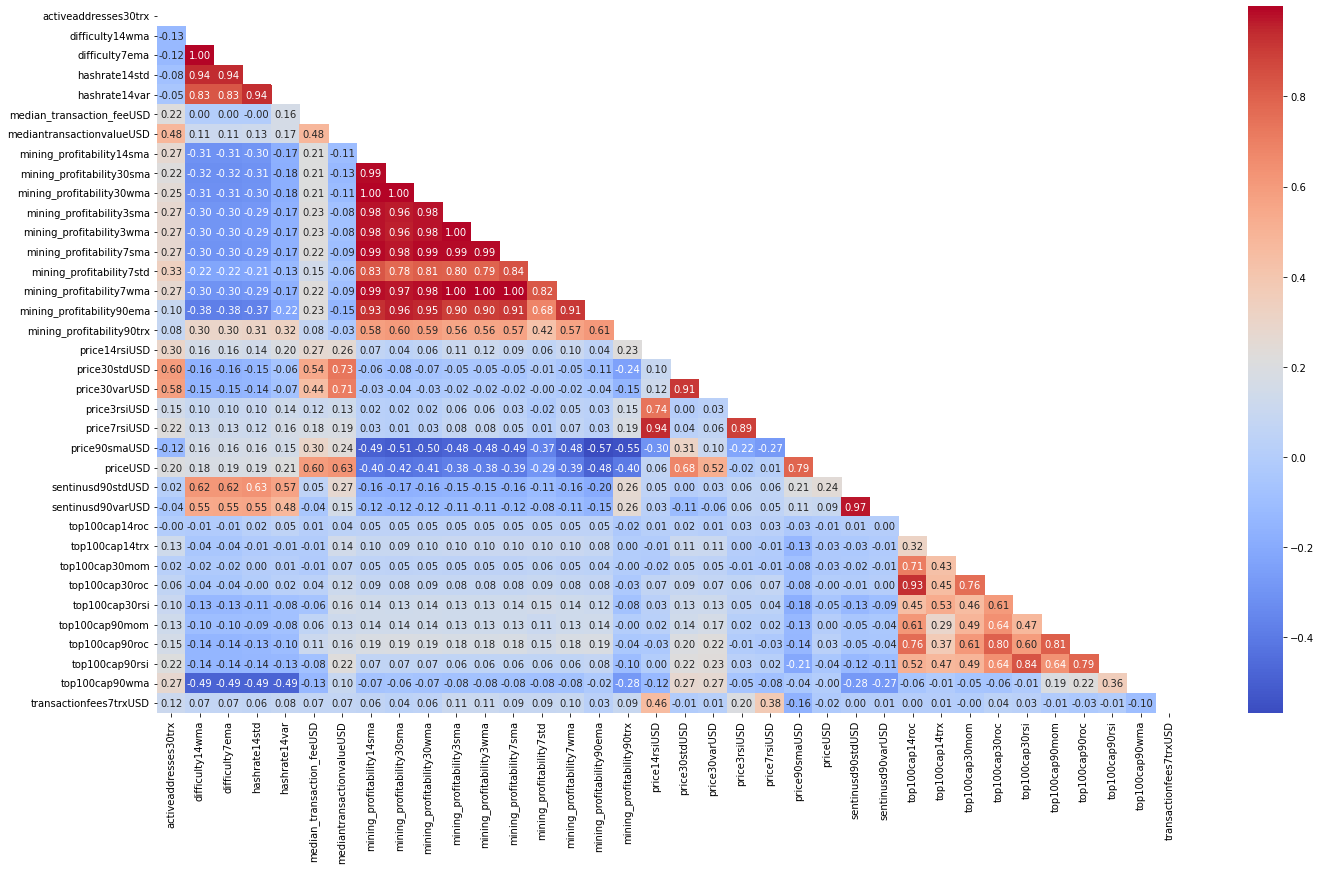

In [23]:
plot_correlation(df)


In [24]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'hashrate14var' at index: 4
dropping 'difficulty7ema' at index: 2
dropping 'mining_profitability30wma' at index: 7
dropping 'mining_profitability7sma' at index: 9
dropping 'mining_profitability14sma' at index: 5
dropping 'mining_profitability7wma' at index: 9
dropping 'sentinusd90varUSD' at index: 19
dropping 'mining_profitability3sma' at index: 6
dropping 'mining_profitability30sma' at index: 5
dropping 'price30stdUSD' at index: 10
dropping 'hashrate14std' at index: 2
dropping 'top100cap90wma' at index: 23
dropping 'price7rsiUSD' at index: 11
dropping 'top100cap90rsi' at index: 21
dropping 'priceUSD' at index: 12
dropping 'price14rsiUSD' at index: 8
dropping 'top100cap30rsi' at index: 16
dropping 'median_transaction_feeUSD' at index: 2
dropping 'top100cap30roc' at index: 14
dropping 'price90smaUSD' at index: 9
dropping 'mining_profitability3wma' at index: 3
dropping 'mediantransactionvalueUSD' at index: 2
dropping 'top100cap90roc' at index: 12
Remaining variables:
Index(['act

feature  feature_importance
2        activeaddresses30trx            0.094742
6             difficulty14wma            0.075593
10   mining_profitability7std            0.059504
5   mining_profitability90ema            0.077903
0   mining_profitability90trx            0.096773
1               price30varUSD            0.095029
11               price3rsiUSD            0.057469
3           sentinusd90stdUSD            0.087785
12             top100cap14roc            0.057263
4              top100cap14trx            0.078162
8              top100cap30mom            0.075148
9              top100cap90mom            0.069361
7      transactionfees7trxUSD            0.075268

1.0


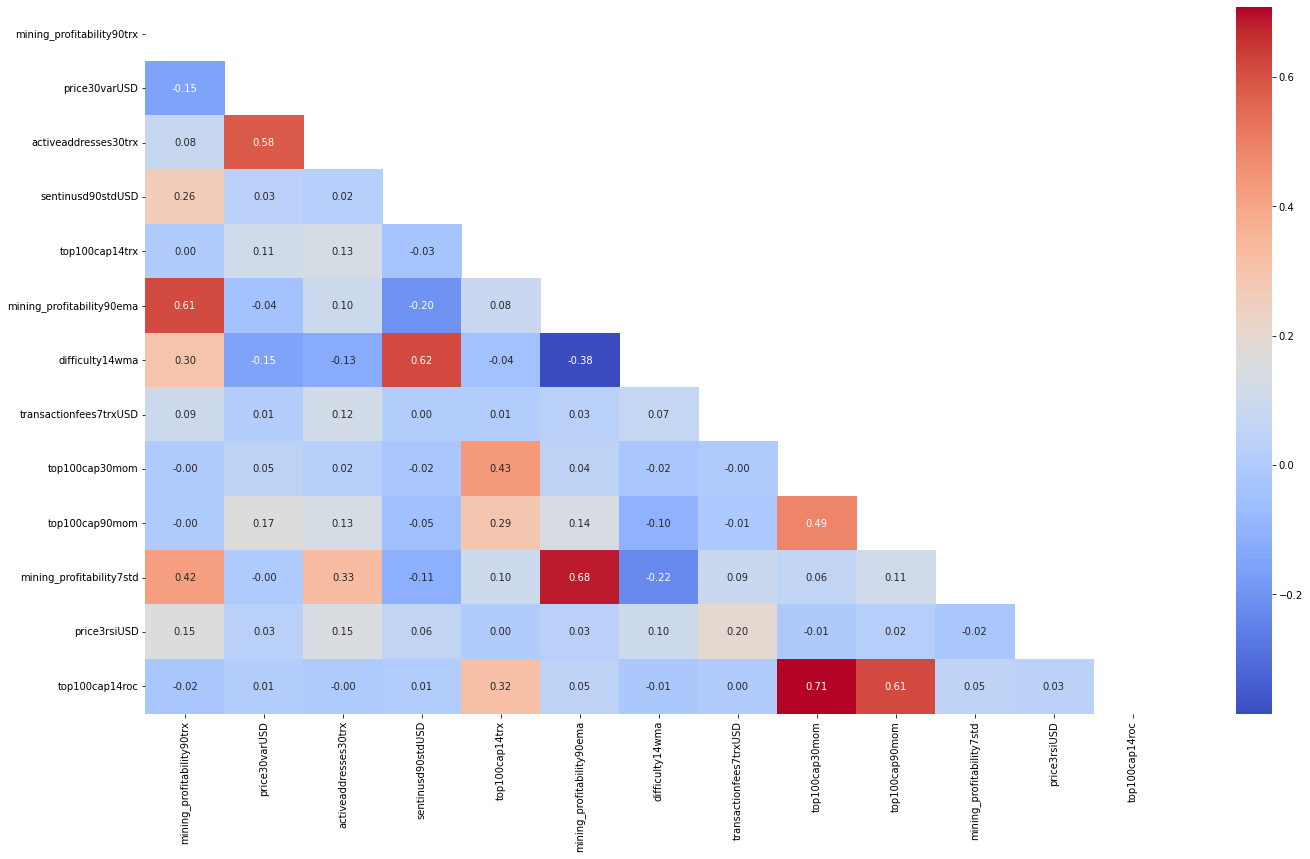

In [26]:
drop_cols_indices = [
    # 17, # price7smaUSD
	# 10, # mining_profitability7sma
	# 26, # mining_profitability3wma
	# 8, # price30varUSD
	# 9, # sentinusd90stdUSD
	# 25, # mining_profitability30sma
	# 30, # mining_profitability7wma
	# 27, # mining_profitability14sma
	# 29, # difficulty7ema
	# 33, # hashrate14std
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 30 days

In [27]:
interval = "interval1"
period = "30"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
21                 difficulty14sma            0.027945
11                 difficulty14trx            0.034918
12                 difficulty14wma            0.030843
15                  difficulty3ema            0.030394
22                  difficulty7ema            0.027591
26                  difficulty7wma            0.021768
18                 difficulty90var            0.028591
24           fee_to_reward30stdUSD            0.024180
7   median_transaction_fee90rocUSD            0.040630
10       median_transaction_feeUSD            0.035736
23            mining_profitability            0.024804
6        mining_profitability30ema            0.043473
9        mining_profitability30sma            0.038991
5        mining_profitability90trx            0.050859
0        mining_profitability90wma            0.065384
20                   price14emaUSD            0.028038
13                   price30varUSD            0.030821
16                   price30wmaUSD            0.030186
19                    price3smaUSD            0.028238
8                     price3wmaUSD            0.039161
17                    price7smaUSD            0.028911
1                    price90emaUSD            0.064848
14                   price90momUSD            0.030759
3                    price90smaUSD            0.058752
2                    price90stdUSD            0.058840
4                         priceUSD            0.051510
25         transactionfees90rsiUSD            0.023829

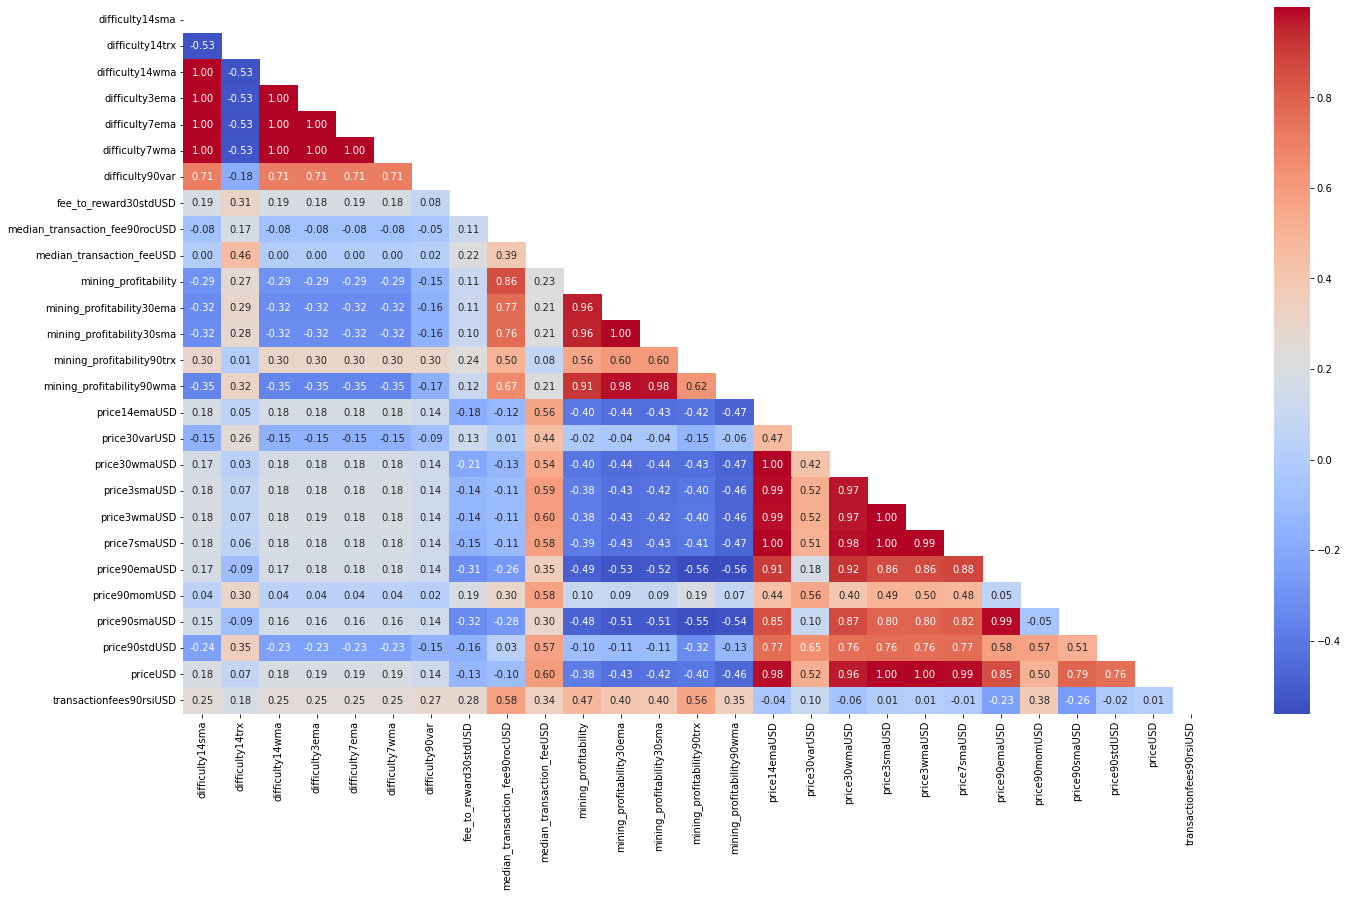

In [28]:
plot_correlation(df)


In [36]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'difficulty7ema' at index: 4
dropping 'difficulty14wma' at index: 2
dropping 'difficulty7wma' at index: 3
dropping 'difficulty3ema' at index: 2
Remaining variables:
Index(['difficulty14sma', 'difficulty14trx', 'difficulty90var',
       'fee_to_reward30stdUSD', 'median_transaction_fee90rocUSD',
       'median_transaction_feeUSD', 'mining_profitability',
       'mining_profitability30ema', 'mining_profitability30sma',
       'mining_profitability90trx', 'mining_profitability90wma',
       'price14emaUSD', 'price30varUSD', 'price30wmaUSD', 'price3smaUSD',
       'price3wmaUSD', 'price7smaUSD', 'price90emaUSD', 'price90momUSD',
       'price90smaUSD', 'price90stdUSD', 'priceUSD', 'transactionfees90rsiUSD',
       'category'],
      dtype='object')


feature  feature_importance
4                  difficulty14sma            0.049914
13                 difficulty14trx            0.039167
12                 difficulty90var            0.040370
18           fee_to_reward30stdUSD            0.029412
9   median_transaction_fee90rocUSD            0.045642
10       median_transaction_feeUSD            0.042553
20            mining_profitability            0.028993
11       mining_profitability30ema            0.041863
6        mining_profitability30sma            0.047379
7        mining_profitability90trx            0.046896
0        mining_profitability90wma            0.079710
8                    price14emaUSD            0.045922
14                   price30varUSD            0.038693
16                   price30wmaUSD            0.034467
22                    price3smaUSD            0.028038
17                    price3wmaUSD            0.031732
19                    price7smaUSD            0.029148
1                    price90emaUSD            0.075909
15                   price90momUSD            0.035486
2                    price90smaUSD            0.058248
3                    price90stdUSD            0.052866
5                         priceUSD            0.049332
21         transactionfees90rsiUSD            0.028259

0.834844162147233


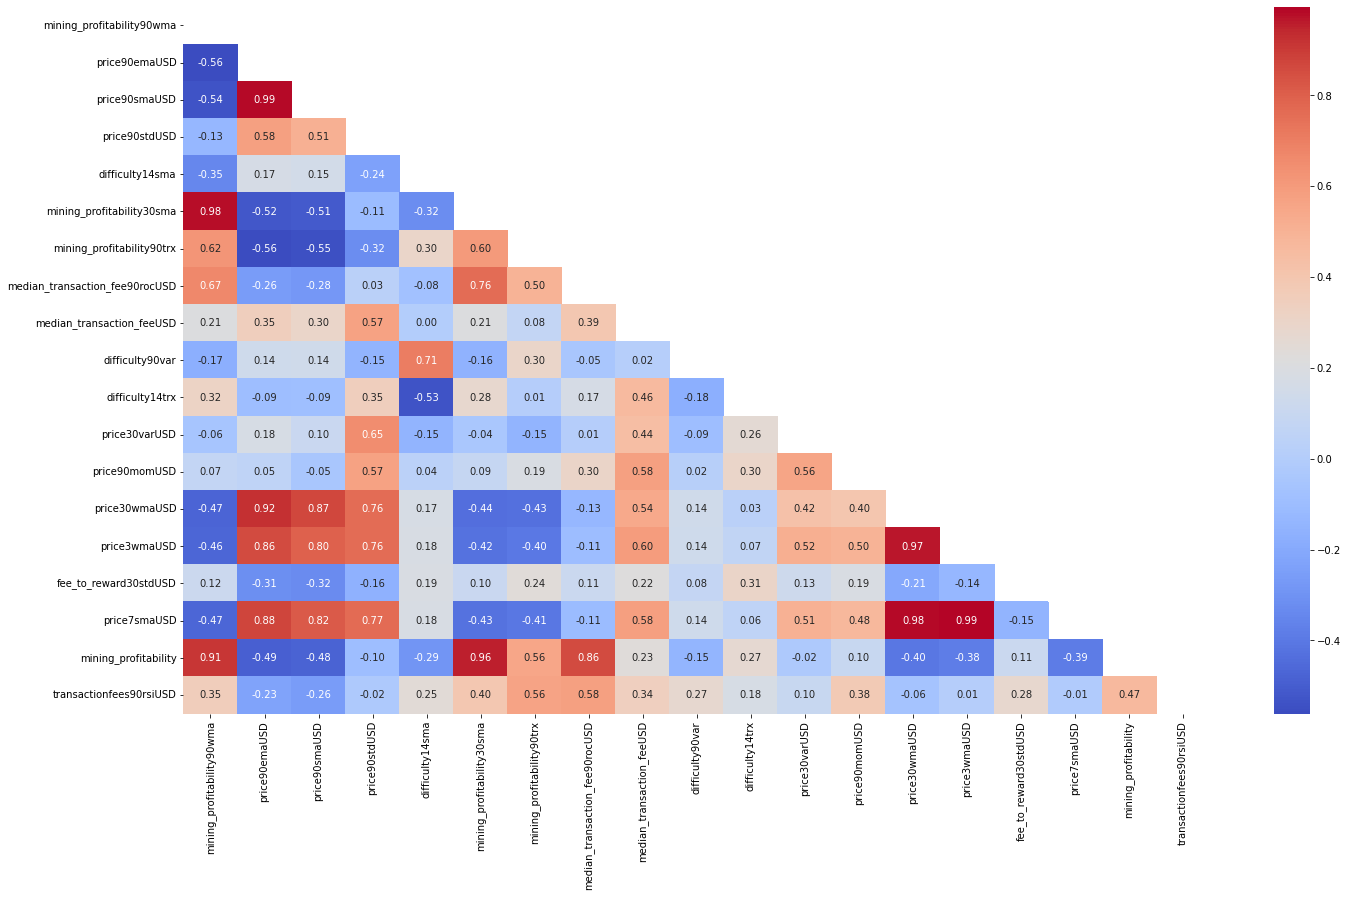

In [40]:
drop_cols_indices = [
	# 26, # difficulty7wma
	22, # price3smaUSD
	8, # price14emaUSD
	5, # priceUSD
	# 12, # difficulty14wma
	# 15, # difficulty3ema
	# 19, # price3smaUSD
	# 17, # price7smaUSD
	11, # mining_profitability30ema
	# 3, # price90smaUSD
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 90 days

In [41]:
interval = "interval1"
period = "90"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
4            difficulty90sma            0.112963
6      fee_to_reward14stdUSD            0.089108
5  mining_profitability90mom            0.110728
1  mining_profitability90trx            0.176658
7              price30varUSD            0.066690
0              price90varUSD            0.181149
2                   priceUSD            0.139753
3             top100cap90roc            0.122950

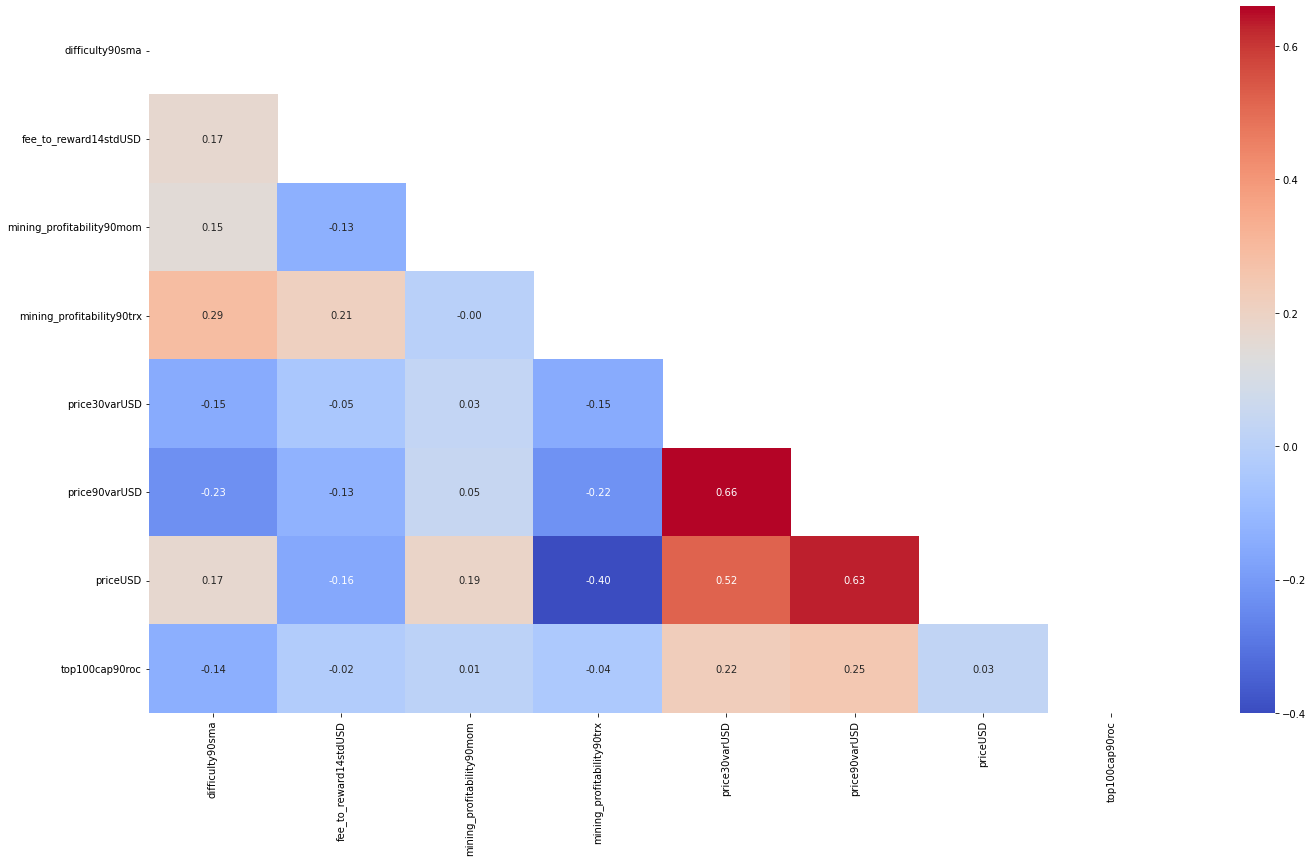

In [42]:
plot_correlation(df)


In [44]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'priceUSD' at index: 6
Remaining variables:
Index(['difficulty90sma', 'fee_to_reward14stdUSD', 'mining_profitability90mom',
       'mining_profitability90trx', 'price30varUSD', 'price90varUSD',
       'top100cap90roc', 'category'],
      dtype='object')


feature  feature_importance
3            difficulty90sma            0.133031
6      fee_to_reward14stdUSD            0.091768
4  mining_profitability90mom            0.128401
1  mining_profitability90trx            0.180832
5              price30varUSD            0.095922
0              price90varUSD            0.215740
2             top100cap90roc            0.154306

1.0


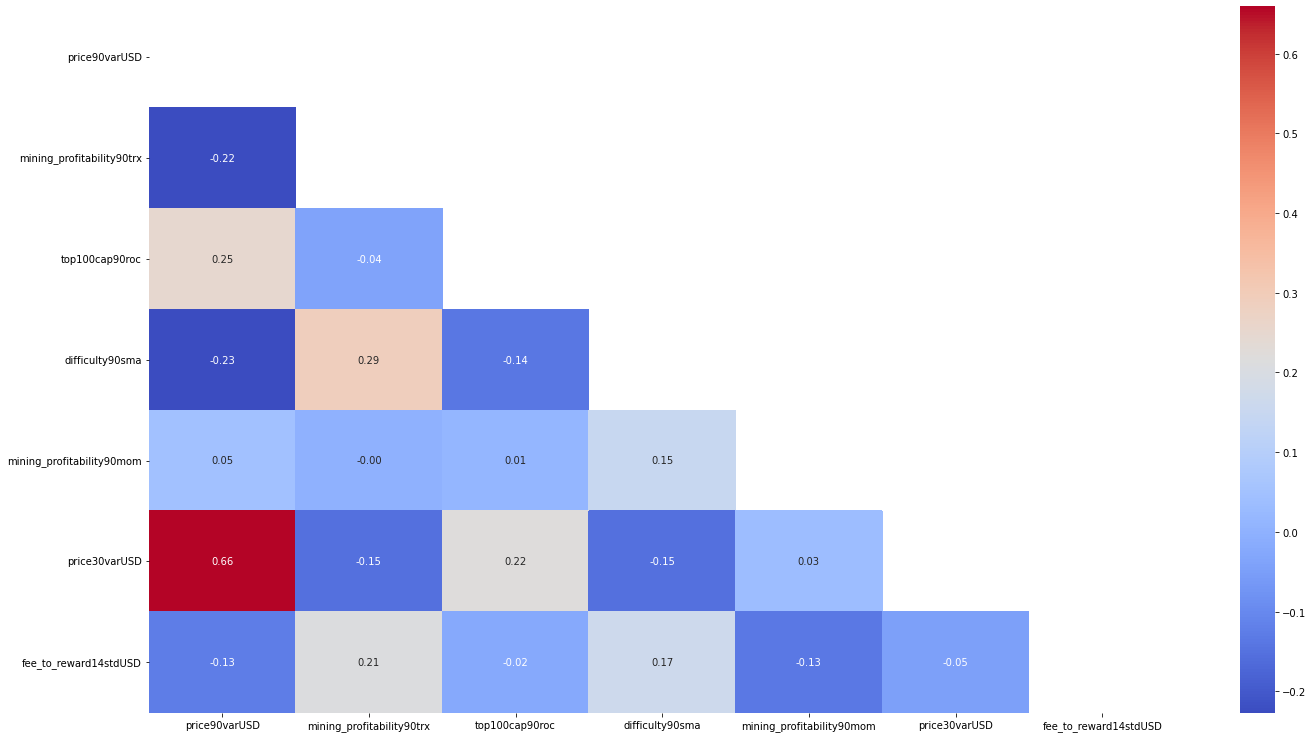

In [45]:
drop_cols_indices = [
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### Save

In [46]:
for period, df in final_datasets[interval].items():
    df.to_csv(f'manual_selected_datasets/cls_{interval}_{period}days.csv',sep=',',index=False)


## Interval 2

### 1 day

In [47]:
interval = "interval2"
period = "1"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
3             activeaddresses30mom            0.036376
25           confirmationtime30ema            0.029902
22            confirmationtime3ema            0.030094
30           confirmationtime90ema            0.028652
29                 difficulty14var            0.028728
5                    hashrate14mom            0.034781
26                   hashrate14trx            0.029823
24                   hashrate30roc            0.030082
17                    hashrate3std            0.030873
19                    hashrate7trx            0.030564
18                   hashrate90roc            0.030702
8    median_transaction_fee3trxUSD            0.033114
28   median_transaction_fee7rocUSD            0.028903
9   mediantransactionvalue14rocUSD            0.032949
12  mediantransactionvalue14rsiUSD            0.032208
23  mediantransactionvalue14smaUSD            0.030085
6    mediantransactionvalue7rsiUSD            0.034405
27       mediantransactionvalueUSD            0.029504
2         mining_profitability3roc            0.037437
7         mining_profitability7std            0.034102
1                     price3rsiUSD            0.040031
20                    price7momUSD            0.030381
11                    price7varUSD            0.032365
15                        priceUSD            0.031101
16              sentbyaddress30var            0.031017
14                    sentinusdUSD            0.031309
4                        size30rsi            0.035407
13                       size30std            0.031996
10                       size30trx            0.032684
0                         size3mom            0.040218
21                       top100cap            0.030207

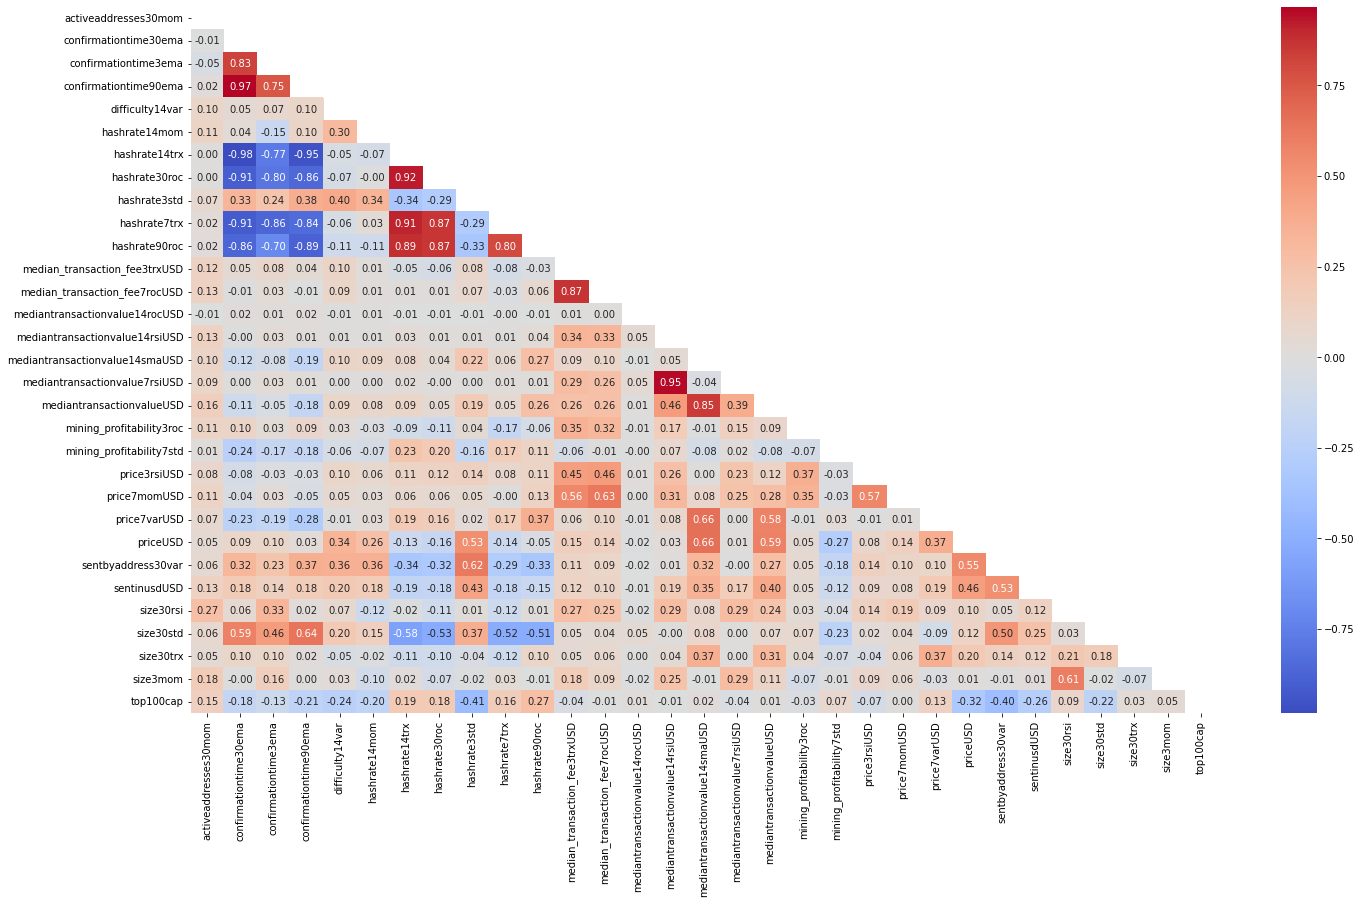

In [48]:
plot_correlation(df)


In [49]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

Remaining variables:
Index(['activeaddresses30mom', 'confirmationtime30ema', 'confirmationtime3ema',
       'confirmationtime90ema', 'difficulty14var', 'hashrate14mom',
       'hashrate14trx', 'hashrate30roc', 'hashrate3std', 'hashrate7trx',
       'hashrate90roc', 'median_transaction_fee3trxUSD',
       'median_transaction_fee7rocUSD', 'mediantransactionvalue14rocUSD',
       'mediantransactionvalue14rsiUSD', 'mediantransactionvalue14smaUSD',
       'mediantransactionvalue7rsiUSD', 'mediantransactionvalueUSD',
       'mining_profitability3roc', 'mining_profitability7std', 'price3rsiUSD',
       'price7momUSD', 'price7varUSD', 'priceUSD', 'sentbyaddress30var',
       'sentinusdUSD', 'size30rsi', 'size30std', 'size30trx', 'size3mom',
       'top100cap', 'category'],
      dtype='object')


feature  feature_importance
3             activeaddresses30mom            0.036376
25           confirmationtime30ema            0.029902
22            confirmationtime3ema            0.030094
30           confirmationtime90ema            0.028652
29                 difficulty14var            0.028728
5                    hashrate14mom            0.034781
26                   hashrate14trx            0.029823
24                   hashrate30roc            0.030082
17                    hashrate3std            0.030873
19                    hashrate7trx            0.030564
18                   hashrate90roc            0.030702
8    median_transaction_fee3trxUSD            0.033114
28   median_transaction_fee7rocUSD            0.028903
9   mediantransactionvalue14rocUSD            0.032949
12  mediantransactionvalue14rsiUSD            0.032208
23  mediantransactionvalue14smaUSD            0.030085
6    mediantransactionvalue7rsiUSD            0.034405
27       mediantransactionvalueUSD            0.029504
2         mining_profitability3roc            0.037437
7         mining_profitability7std            0.034102
1                     price3rsiUSD            0.040031
20                    price7momUSD            0.030381
11                    price7varUSD            0.032365
15                        priceUSD            0.031101
16              sentbyaddress30var            0.031017
14                    sentinusdUSD            0.031309
4                        size30rsi            0.035407
13                       size30std            0.031996
10                       size30trx            0.032684
0                         size3mom            0.040218
21                       top100cap            0.030207

0.9114430953463168


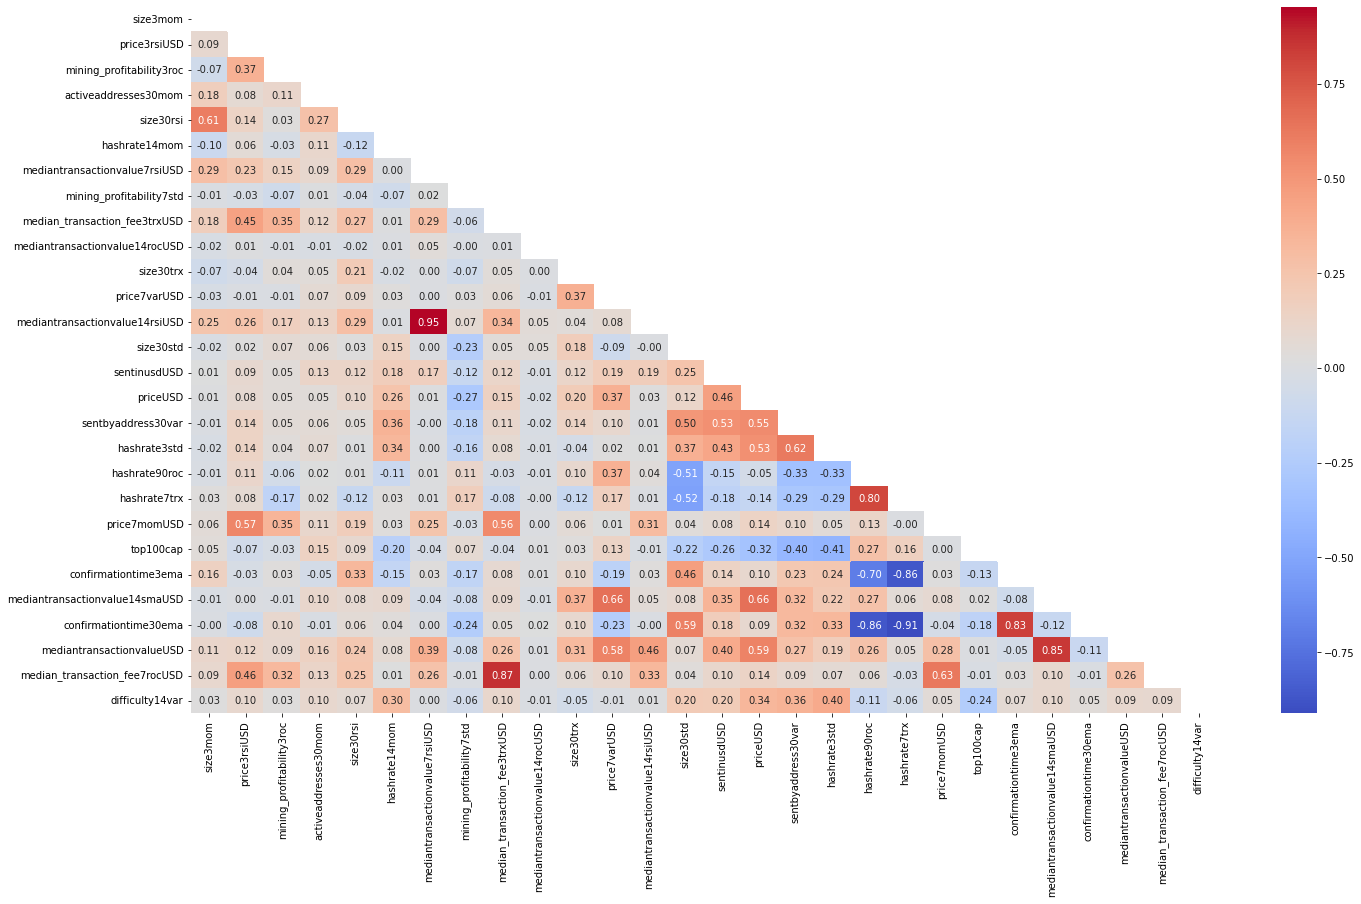

In [52]:
drop_cols_indices = [
    26, # hashrate14trx,
    30, # confirmationtime90ema
    24, # hashrate30roc
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 7 days

In [53]:
interval = "interval2"
period = "7"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
0        activeaddresses30trx            0.047441
19            difficulty14ema            0.026593
30             difficulty7ema            0.022524
13             difficulty7trx            0.030755
16            difficulty90std            0.028242
15              hashrate14std            0.029269
25              hashrate14var            0.024583
3   median_transaction_feeUSD            0.034981
21  mediantransactionvalueUSD            0.026286
7   mining_profitability14sma            0.032691
11  mining_profitability14wma            0.030979
24  mining_profitability30ema            0.024921
22  mining_profitability30wma            0.025807
20   mining_profitability3wma            0.026407
31   mining_profitability7sma            0.022511
8   mining_profitability90sma            0.032393
1   mining_profitability90trx            0.036582
6               price30momUSD            0.032716
10              price30stdUSD            0.031898
23              price30varUSD            0.024942
28               price3trxUSD            0.023457
33               price7momUSD            0.020601
32               price7rocUSD            0.021965
29               price7rsiUSD            0.023319
9               price90momUSD            0.031968
5               price90rocUSD            0.034148
4                    priceUSD            0.034489
2           sentinusd90varUSD            0.035959
26                  top100cap            0.024128
34             top100cap14mom            0.017546
27             top100cap14roc            0.023483
14             top100cap14trx            0.030514
18             top100cap30roc            0.027364
17             top100cap30rsi            0.027741
12             top100cap90wma            0.030796

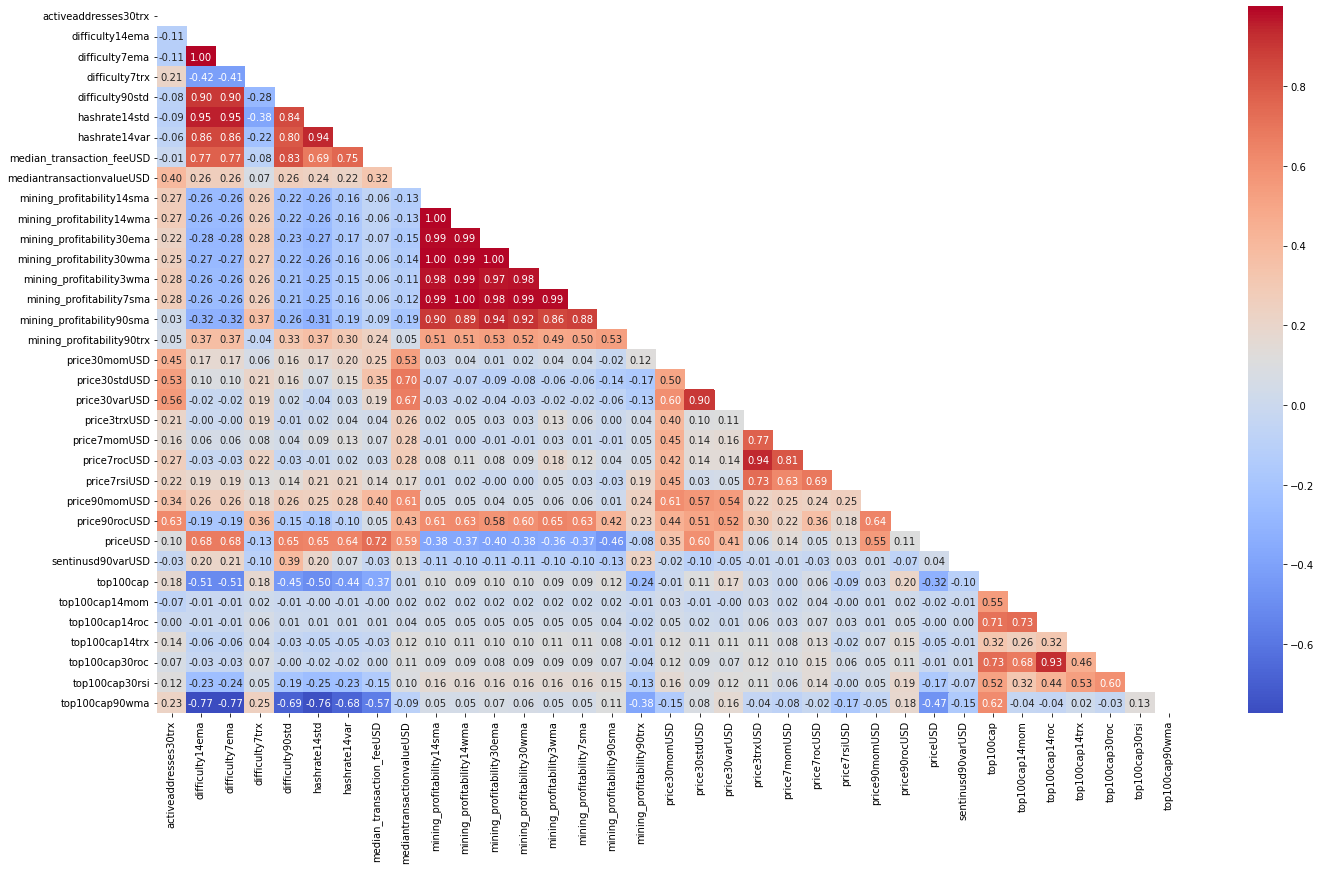

In [54]:
plot_correlation(df)


In [55]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'hashrate14var' at index: 6
dropping 'difficulty7ema' at index: 2
dropping 'mining_profitability30ema' at index: 9
dropping 'mining_profitability30wma' at index: 9
dropping 'mining_profitability14wma' at index: 8
dropping 'mining_profitability14sma' at index: 7
dropping 'difficulty14ema' at index: 1
dropping 'median_transaction_feeUSD' at index: 4
Remaining variables:
Index(['activeaddresses30trx', 'difficulty7trx', 'difficulty90std',
       'hashrate14std', 'mediantransactionvalueUSD',
       'mining_profitability3wma', 'mining_profitability7sma',
       'mining_profitability90sma', 'mining_profitability90trx',
       'price30momUSD', 'price30stdUSD', 'price30varUSD', 'price3trxUSD',
       'price7momUSD', 'price7rocUSD', 'price7rsiUSD', 'price90momUSD',
       'price90rocUSD', 'priceUSD', 'sentinusd90varUSD', 'top100cap',
       'top100cap14mom', 'top100cap14roc', 'top100cap14trx', 'top100cap30roc',
       'top100cap30rsi', 'top100cap90wma', 'category'],
      dtype='object'

feature  feature_importance
0        activeaddresses30trx            0.052562
17             difficulty7trx            0.034416
13            difficulty90std            0.037129
11              hashrate14std            0.040372
25  mediantransactionvalueUSD            0.025898
16   mining_profitability3wma            0.036099
4    mining_profitability7sma            0.043895
6   mining_profitability90sma            0.041567
1   mining_profitability90trx            0.051174
12              price30momUSD            0.038052
5               price30stdUSD            0.043855
3               price30varUSD            0.044965
23               price3trxUSD            0.026719
20               price7momUSD            0.028856
26               price7rocUSD            0.023998
21               price7rsiUSD            0.028748
14              price90momUSD            0.037096
10              price90rocUSD            0.040643
2                    priceUSD            0.046139
7           sentinusd90varUSD            0.041522
19                  top100cap            0.031540
24             top100cap14mom            0.026195
22             top100cap14roc            0.027921
8              top100cap14trx            0.041343
15             top100cap30roc            0.036466
18             top100cap30rsi            0.031758
9              top100cap90wma            0.041073

0.9321064896587848


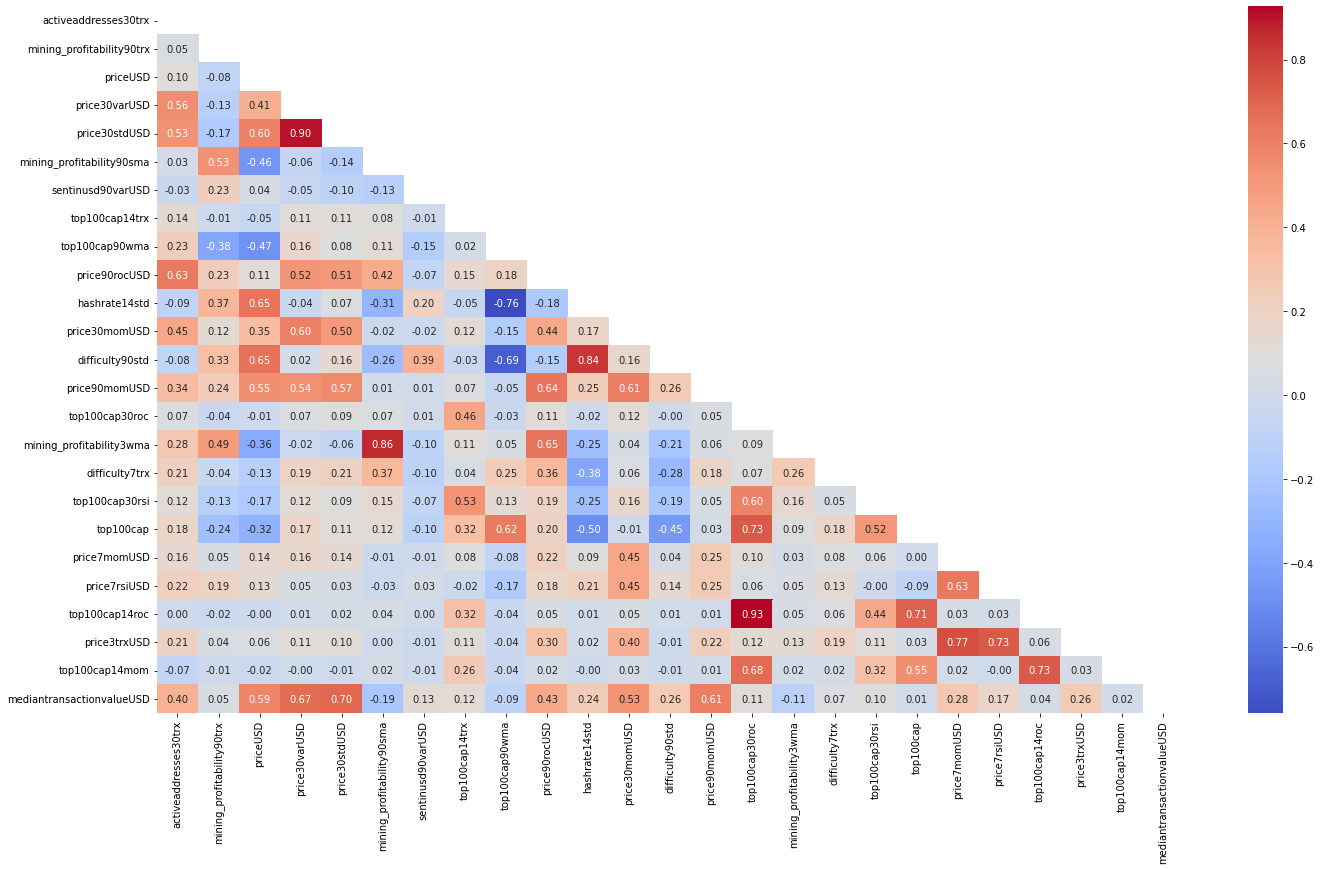

In [58]:
drop_cols_indices = [
    # 24, # mining_profitability30ema,
    4, # mining_profitability7sma
    # 7, # mining_profitability14sma
    # 23, # price30varUSD
    # 30, # difficulty7ema
    26, # price7rocUSD
    # 12, # top100cap90wma
    # 11, # mining_profitability14wma	
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 30 days

In [59]:
interval = "interval2"
period = "30"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
19            difficulty14ema            0.024324
11            difficulty14sma            0.034062
12            difficulty14trx            0.034055
13            difficulty14wma            0.033738
21            difficulty30ema            0.022108
25             difficulty3ema            0.020925
20             difficulty7ema            0.023393
15            difficulty90std            0.029990
6       fee_to_reward90smaUSD            0.048748
24              hashrate14std            0.020991
22              hashrate30sma            0.021573
17              hashrate30wma            0.026356
16              hashrate90ema            0.029561
5   median_transaction_feeUSD            0.050136
18  mediantransactionvalueUSD            0.024954
23       mining_profitability            0.021366
14  mining_profitability30std            0.033443
9    mining_profitability3sma            0.035215
7    mining_profitability3wma            0.038871
10   mining_profitability7wma            0.034882
8   mining_profitability90rsi            0.036726
2   mining_profitability90trx            0.064683
1   mining_profitability90wma            0.073183
26               price7rsiUSD            0.019906
0               price90rocUSD            0.080230
3               price90varUSD            0.061726
4                    priceUSD            0.054856

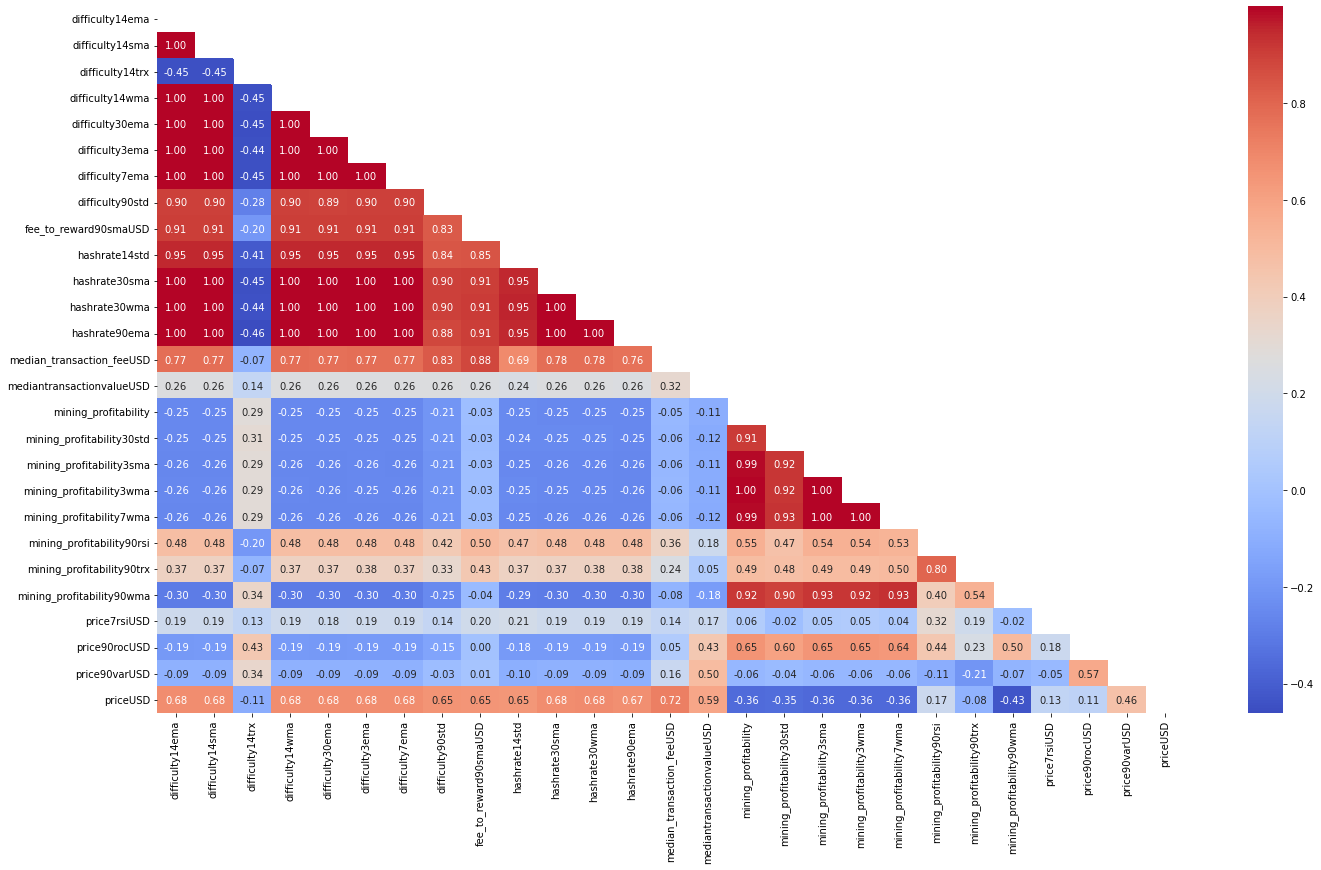

In [60]:
plot_correlation(df)


In [61]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'difficulty7ema' at index: 6
dropping 'difficulty14ema' at index: 0
dropping 'difficulty14wma' at index: 2
dropping 'difficulty30ema' at index: 2
dropping 'hashrate30sma' at index: 6
dropping 'difficulty14sma' at index: 0
dropping 'hashrate30wma' at index: 5
dropping 'difficulty3ema' at index: 1
dropping 'mining_profitability7wma' at index: 11
dropping 'mining_profitability3wma' at index: 10
dropping 'mining_profitability3sma' at index: 9
dropping 'hashrate90ema' at index: 4
dropping 'hashrate14std' at index: 3
dropping 'mining_profitability90rsi' at index: 7
dropping 'priceUSD' at index: 12
dropping 'mining_profitability' at index: 5
dropping 'median_transaction_feeUSD' at index: 3
dropping 'mining_profitability30std' at index: 4
dropping 'fee_to_reward90smaUSD' at index: 2
dropping 'price7rsiUSD' at index: 5
dropping 'mediantransactionvalueUSD' at index: 2
Remaining variables:
Index(['difficulty14trx', 'difficulty90std', 'mining_profitability90trx',
       'mining_profitabil

feature  feature_importance
5            difficulty14trx            0.100683
3            difficulty90std            0.161133
1  mining_profitability90trx            0.196001
0  mining_profitability90wma            0.209575
2              price90rocUSD            0.180317
4              price90varUSD            0.152292

1.0


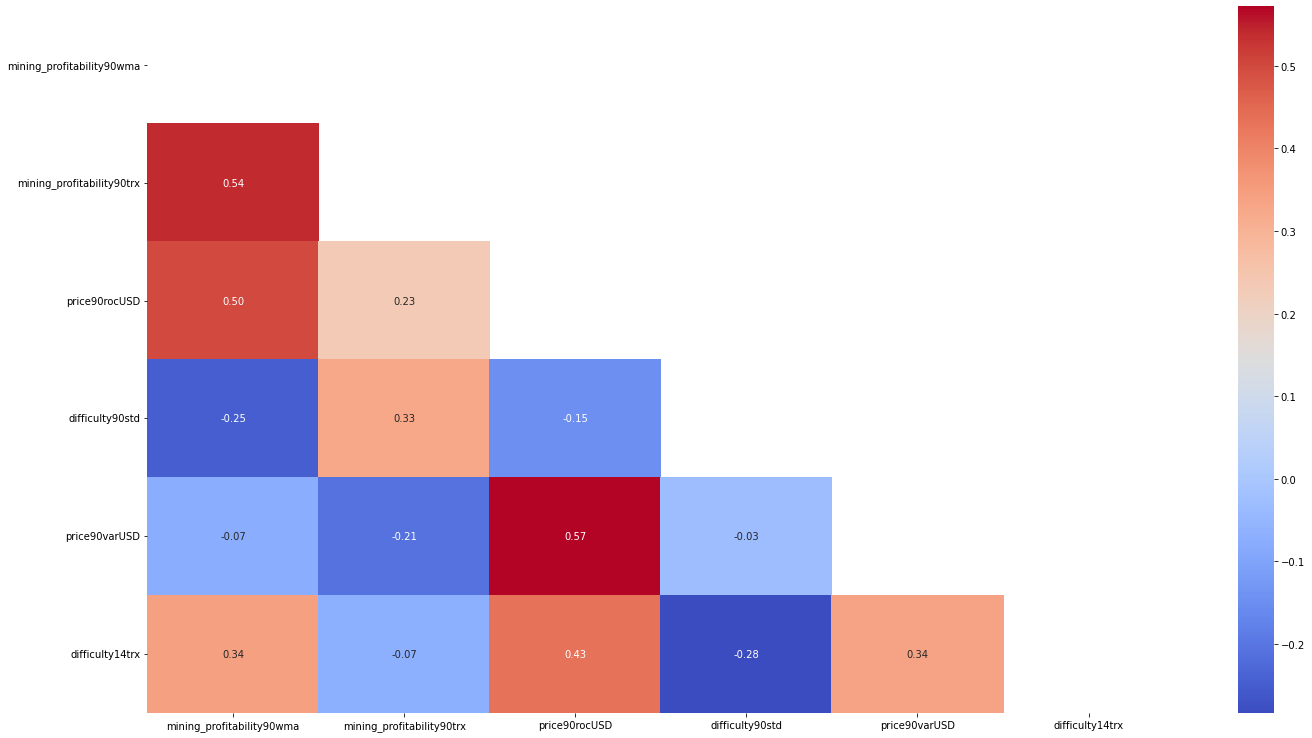

In [62]:
drop_cols_indices = [
    # 19, # difficulty14ema
    # 13, # difficulty14wma
    # 22, # hashrate30sma 
    # 9, # mining_profitability3sma 
    # 11, # difficulty14sma
    # 25, # difficulty3ema
    # 17, # hashrate30wma
    # 16, # hashrate90ema
    # 7, # mining_profitability3wma
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 90 days

In [149]:
interval = "interval2"
period = "90"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
4        activeaddresses90var            0.052914
16            difficulty14ema            0.030883
17            difficulty14wma            0.029014
14            difficulty30ema            0.033782
18            difficulty30sma            0.027151
20             difficulty3ema            0.025703
15             difficulty7ema            0.032366
5             difficulty90ema            0.052196
22            difficulty90rsi            0.023371
6       fee_to_reward30wmaUSD            0.049545
19      fee_to_reward90smaUSD            0.026240
3       fee_to_reward90wmaUSD            0.054650
11  median_transaction_feeUSD            0.043773
23       mining_profitability            0.019727
7   mining_profitability14std            0.049141
12  mining_profitability14var            0.039775
10  mining_profitability30std            0.044278
2   mining_profitability90mom            0.067048
0   mining_profitability90trx            0.076418
1                    priceUSD            0.068525
13         sentbyaddress90std            0.036023
21             top100cap30rsi            0.023627
9              top100cap30trx            0.046602
8              top100cap90roc            0.047249

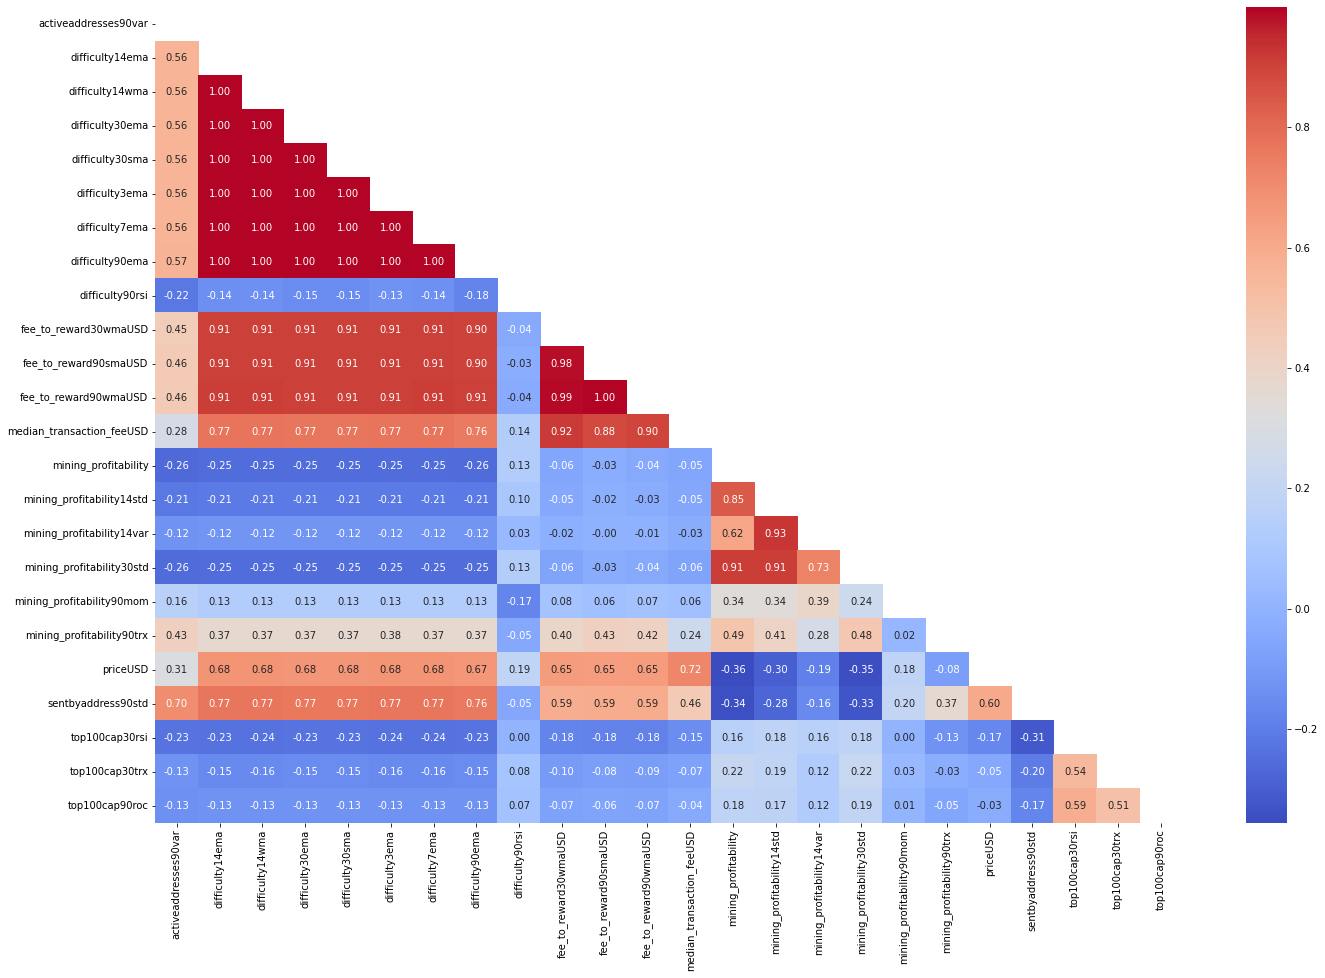

In [150]:
plot_correlation(df)


In [151]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'difficulty14ema' at index: 1
dropping 'difficulty7ema' at index: 5
dropping 'difficulty30ema' at index: 2
dropping 'difficulty14wma' at index: 1
dropping 'difficulty30sma' at index: 1
dropping 'fee_to_reward90wmaUSD' at index: 6
dropping 'difficulty3ema' at index: 1
dropping 'fee_to_reward30wmaUSD' at index: 3
dropping 'difficulty90rsi' at index: 2
dropping 'mining_profitability14std' at index: 5
dropping 'difficulty90ema' at index: 1
dropping 'top100cap30rsi' at index: 10
dropping 'priceUSD' at index: 8
dropping 'fee_to_reward90smaUSD' at index: 1
dropping 'mining_profitability30std' at index: 4
dropping 'sentbyaddress90std' at index: 6
Remaining variables:
Index(['activeaddresses90var', 'median_transaction_feeUSD',
       'mining_profitability', 'mining_profitability14var',
       'mining_profitability90mom', 'mining_profitability90trx',
       'top100cap30trx', 'top100cap90roc', 'category'],
      dtype='object')


feature  feature_importance
1       activeaddresses90var            0.151944
5  median_transaction_feeUSD            0.101362
6       mining_profitability            0.093694
3  mining_profitability14var            0.121659
2  mining_profitability90mom            0.149589
0  mining_profitability90trx            0.178638
4             top100cap30trx            0.115450
7             top100cap90roc            0.087664

1.0


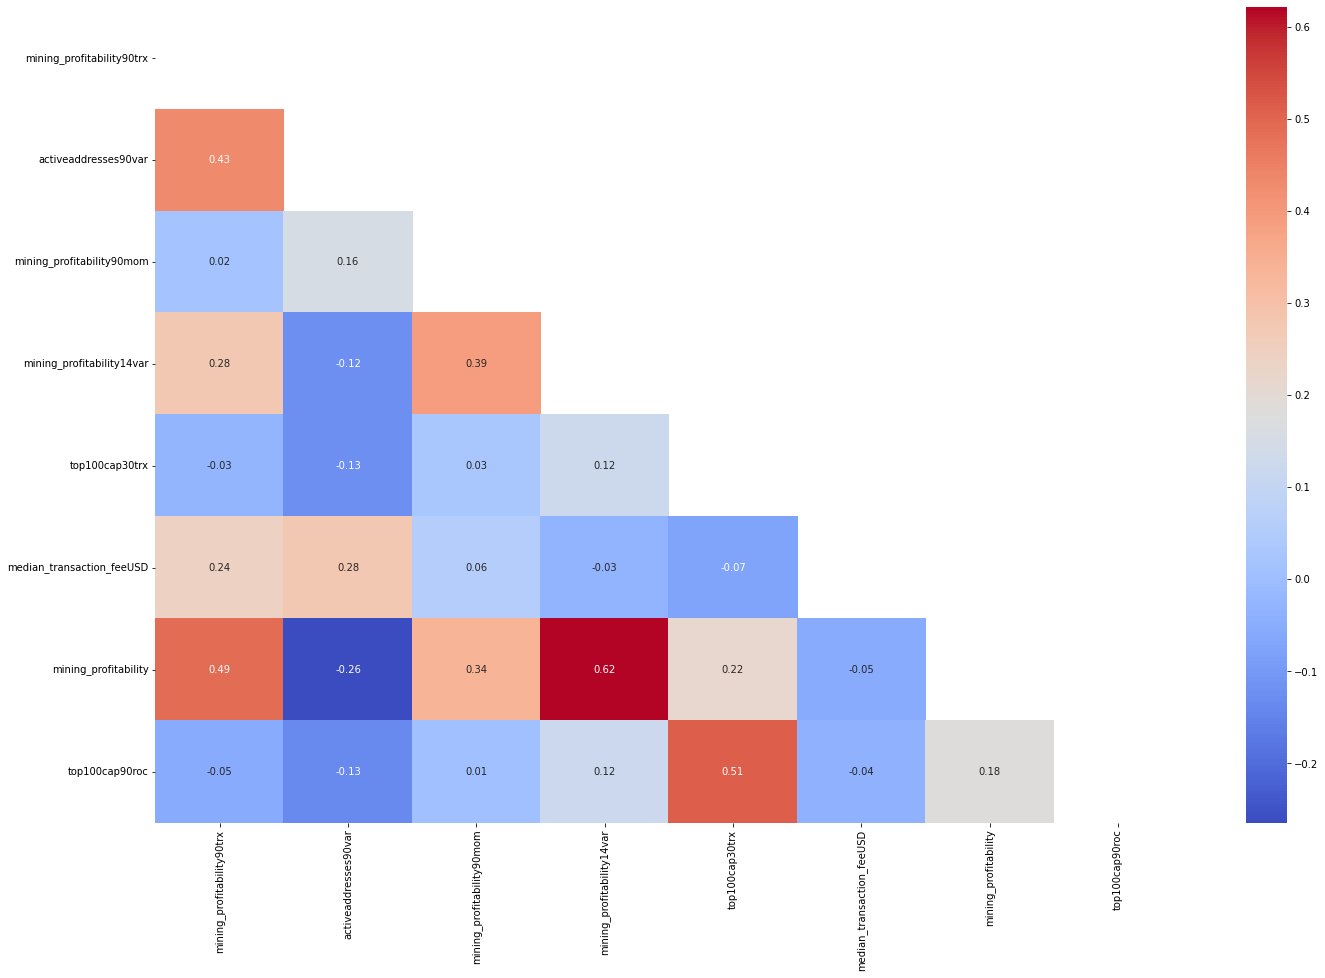

In [152]:
drop_cols_indices = [
    # 19, # difficulty14ema
    # 13, # difficulty14wma
    # 22, # hashrate30sma 
    # 9, # mining_profitability3sma 
    # 11, # difficulty14sma
    # 25, # difficulty3ema
    # 17, # hashrate30wma
    # 16, # hashrate90ema
    # 7, # mining_profitability3wma
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### Save

In [72]:
for period, df in final_datasets[interval].items():
    df.to_csv(f'manual_selected_datasets/cls_{interval}_{period}days.csv',sep=',',index=False)

## Interval 3

### 1 day

In [145]:
interval = "interval3"
period = "1"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
24                 activeaddresses            0.024250
9              activeaddresses7trx            0.026604
38                confirmationtime            0.022196
34           confirmationtime14wma            0.022993
13           confirmationtime30sma            0.026101
36            confirmationtime3ema            0.022527
30            confirmationtime3wma            0.023514
27            confirmationtime7wma            0.023741
2                  difficulty14var            0.030110
28           fee_to_reward14emaUSD            0.023607
1             fee_to_reward3stdUSD            0.031814
37            fee_to_reward7emaUSD            0.022398
20                fee_to_rewardUSD            0.025049
22                   hashrate14trx            0.024743
17                   hashrate30mom            0.025602
33                    hashrate7std            0.023013
35       median_transaction_feeUSD            0.022797
18  mediantransactionvalue14momUSD            0.025501
16  mediantransactionvalue14rocUSD            0.025740
25       mediantransactionvalueUSD            0.024063
19                   price14rsiUSD            0.025234
10                   price30rocUSD            0.026586
23                   price30rsiUSD            0.024665
14                    price3momUSD            0.025995
8                     price3rocUSD            0.027129
0                     price3rsiUSD            0.033625
5                     price3trxUSD            0.028442
21                    price7momUSD            0.024820
4                     price7rocUSD            0.028908
11                    price7rsiUSD            0.026184
29                        priceUSD            0.023544
32                        size3sma            0.023382
12                       size90mom            0.026152
6                        size90roc            0.028062
15                       size90sma            0.025828
26                  top100cap90rsi            0.024011
7                 transactions3var            0.027777
3                 transactions7var            0.029849
31             transactionvalueUSD            0.023443

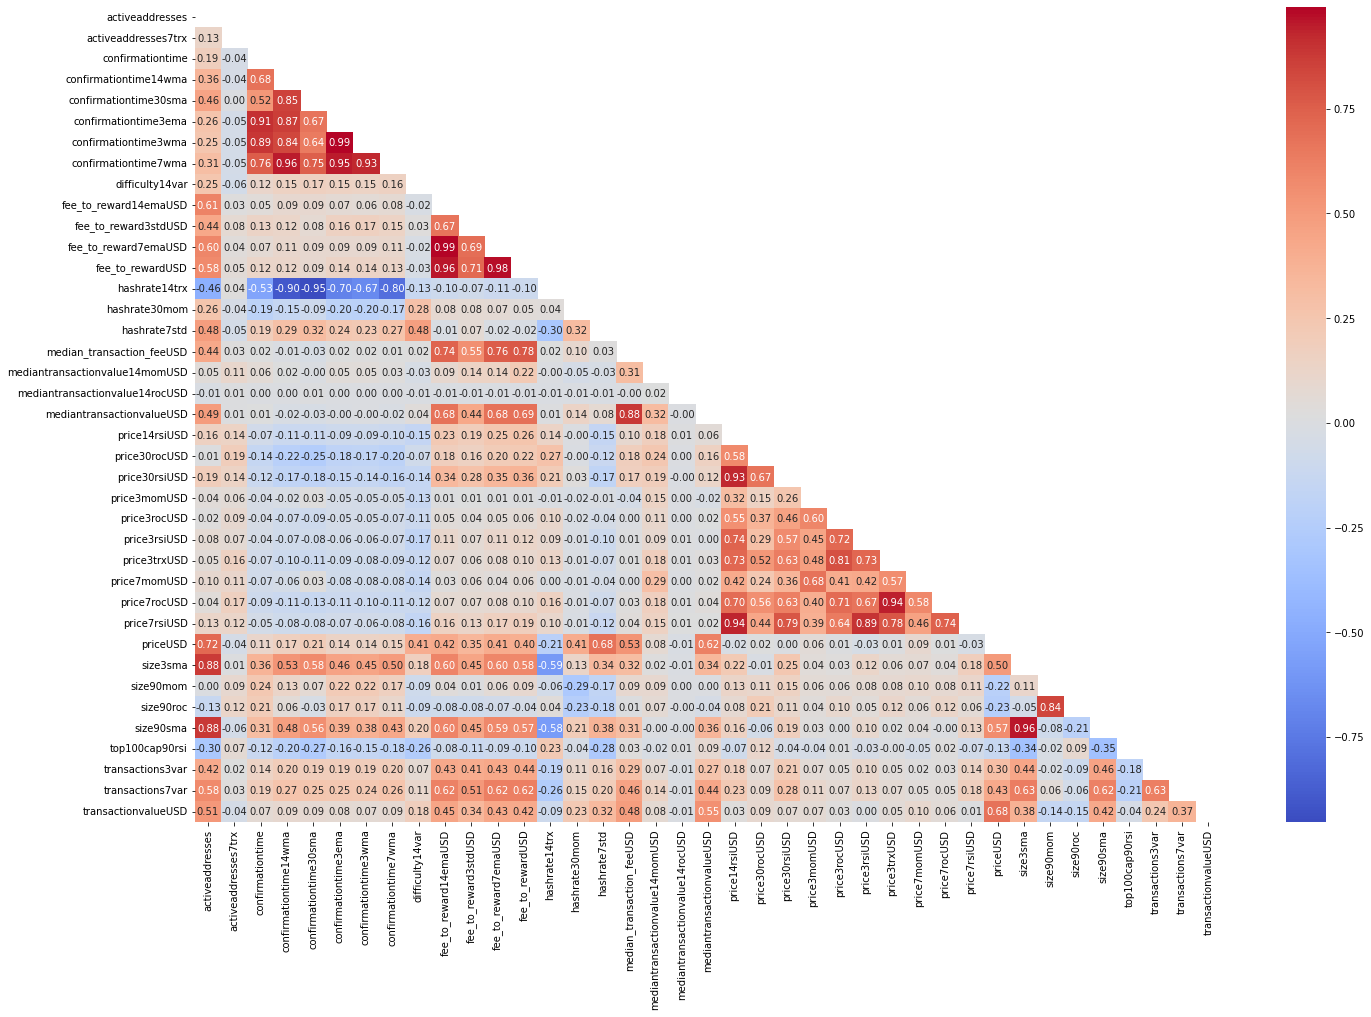

In [146]:
plot_correlation(df)


In [147]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

Remaining variables:
Index(['activeaddresses', 'activeaddresses7trx', 'confirmationtime',
       'confirmationtime14wma', 'confirmationtime30sma',
       'confirmationtime3ema', 'confirmationtime3wma', 'confirmationtime7wma',
       'difficulty14var', 'fee_to_reward14emaUSD', 'fee_to_reward3stdUSD',
       'fee_to_reward7emaUSD', 'fee_to_rewardUSD', 'hashrate14trx',
       'hashrate30mom', 'hashrate7std', 'median_transaction_feeUSD',
       'mediantransactionvalue14momUSD', 'mediantransactionvalue14rocUSD',
       'mediantransactionvalueUSD', 'price14rsiUSD', 'price30rocUSD',
       'price30rsiUSD', 'price3momUSD', 'price3rocUSD', 'price3rsiUSD',
       'price3trxUSD', 'price7momUSD', 'price7rocUSD', 'price7rsiUSD',
       'priceUSD', 'size3sma', 'size90mom', 'size90roc', 'size90sma',
       'top100cap90rsi', 'transactions3var', 'transactions7var',
       'transactionvalueUSD', 'category'],
      dtype='object')


feature  feature_importance
24                 activeaddresses            0.024250
9              activeaddresses7trx            0.026604
38                confirmationtime            0.022196
34           confirmationtime14wma            0.022993
13           confirmationtime30sma            0.026101
36            confirmationtime3ema            0.022527
30            confirmationtime3wma            0.023514
27            confirmationtime7wma            0.023741
2                  difficulty14var            0.030110
28           fee_to_reward14emaUSD            0.023607
1             fee_to_reward3stdUSD            0.031814
37            fee_to_reward7emaUSD            0.022398
20                fee_to_rewardUSD            0.025049
22                   hashrate14trx            0.024743
17                   hashrate30mom            0.025602
33                    hashrate7std            0.023013
35       median_transaction_feeUSD            0.022797
18  mediantransactionvalue14momUSD            0.025501
16  mediantransactionvalue14rocUSD            0.025740
25       mediantransactionvalueUSD            0.024063
19                   price14rsiUSD            0.025234
10                   price30rocUSD            0.026586
23                   price30rsiUSD            0.024665
14                    price3momUSD            0.025995
8                     price3rocUSD            0.027129
0                     price3rsiUSD            0.033625
5                     price3trxUSD            0.028442
21                    price7momUSD            0.024820
4                     price7rocUSD            0.028908
11                    price7rsiUSD            0.026184
29                        priceUSD            0.023544
32                        size3sma            0.023382
12                       size90mom            0.026152
6                        size90roc            0.028062
15                       size90sma            0.025828
26                  top100cap90rsi            0.024011
7                 transactions3var            0.027777
3                 transactions7var            0.029849
31             transactionvalueUSD            0.023443

0.9303471093835766


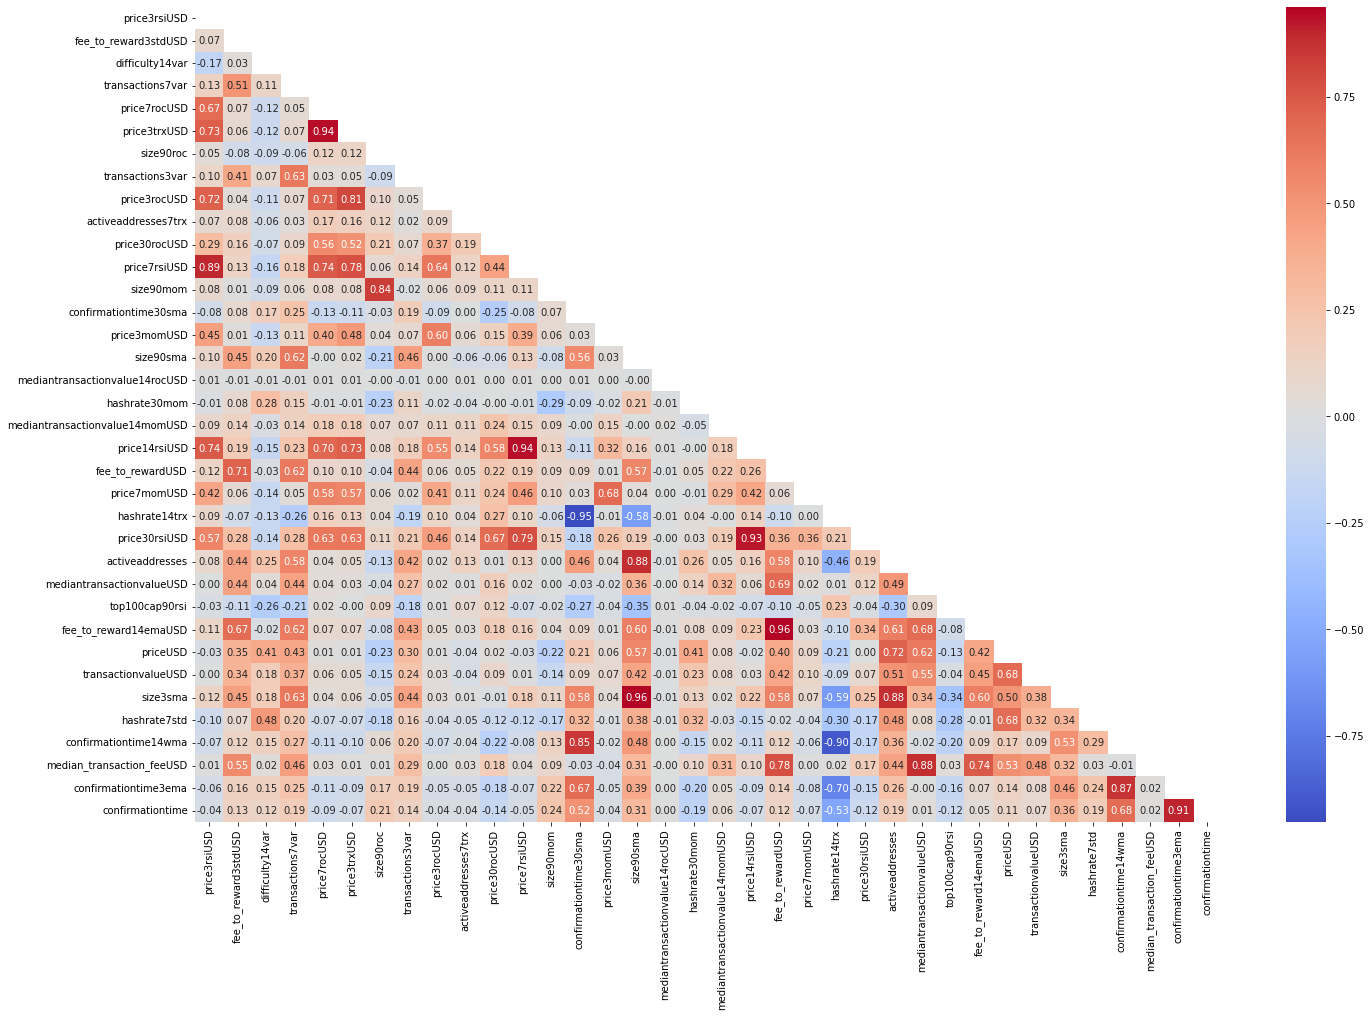

In [148]:
drop_cols_indices = [
    27, # confirmationtime7wma
    30, # confirmationtime3wma
    37, # fee_to_reward7emaUSD
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 7 days

In [140]:
interval = "interval3"
period = "7"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
11            difficulty14sma            0.027852
2             difficulty14trx            0.033628
16            difficulty14var            0.027031
10            difficulty30ema            0.028329
29             difficulty7trx            0.023584
9             difficulty90var            0.028529
3       fee_to_reward90trxUSD            0.032168
5               hashrate14std            0.031314
1               hashrate30trx            0.034318
26               hashrate7sma            0.025818
32  median_transaction_feeUSD            0.022355
15       mining_profitability            0.027366
20              price14rocUSD            0.026430
23              price14wmaUSD            0.025908
24              price30smaUSD            0.025877
4               price30stdUSD            0.031698
7               price30varUSD            0.030121
28              price30wmaUSD            0.024136
30               price3emaUSD            0.023267
31               price3smaUSD            0.022496
25               price3wmaUSD            0.025870
19               price7rocUSD            0.026708
21               price7rsiUSD            0.026174
12               price7wmaUSD            0.027632
22              price90emaUSD            0.026161
13              price90momUSD            0.027580
0               price90rocUSD            0.035022
17              price90smaUSD            0.026893
6               price90wmaUSD            0.030206
14                   priceUSD            0.027462
8                   top100cap            0.029054
36             top100cap14mom            0.021614
34             top100cap14rsi            0.021737
35             top100cap30mom            0.021615
33             top100cap30roc            0.021951
18             top100cap30rsi            0.026802
27             top100cap90rsi            0.025295

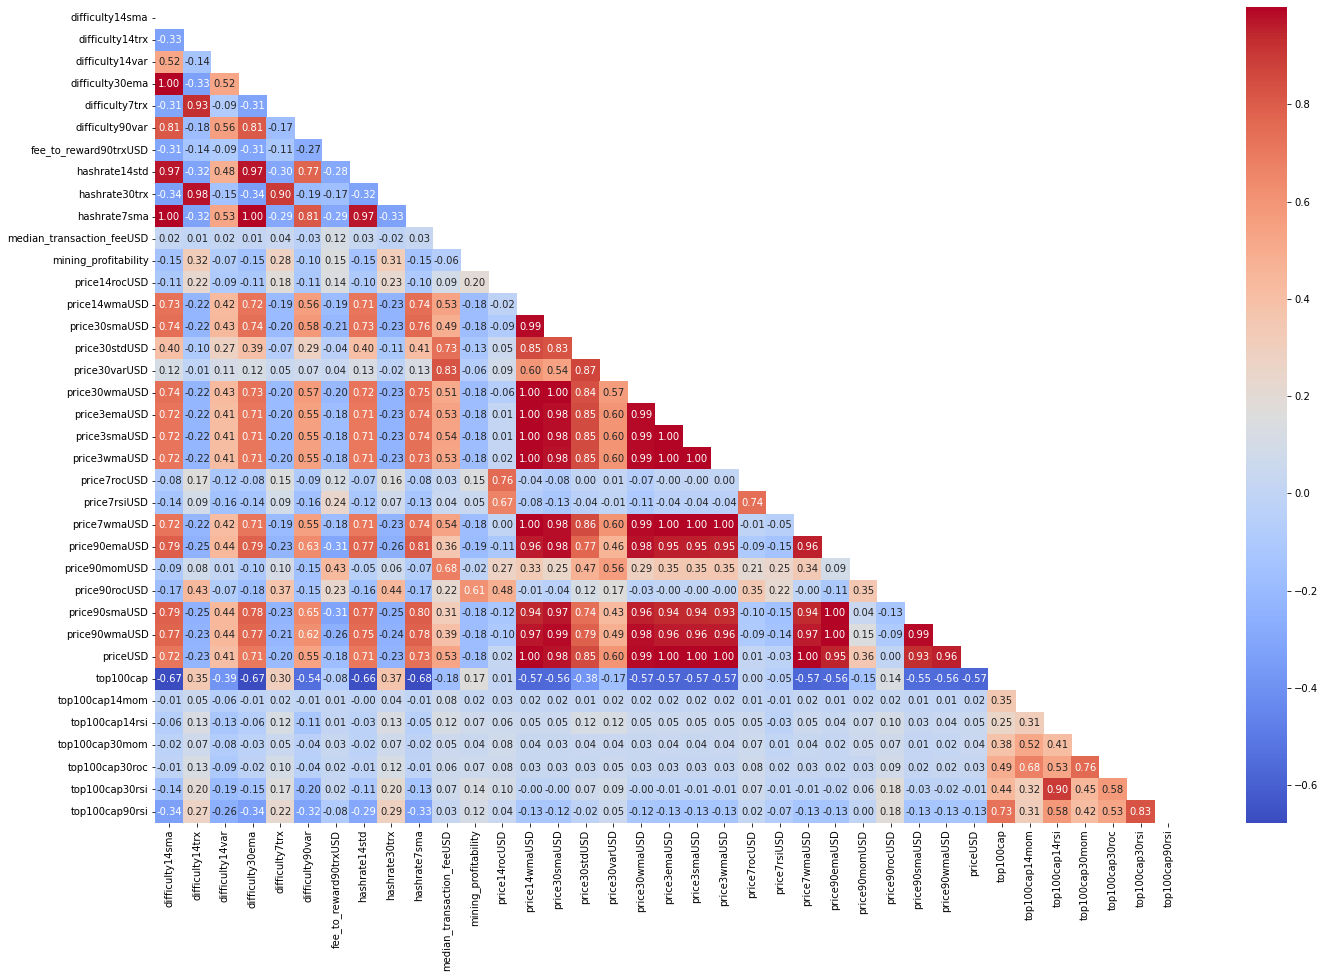

In [141]:
plot_correlation(df)


In [142]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

dropping 'difficulty14sma' at index: 0
dropping 'difficulty30ema' at index: 2
dropping 'hashrate7sma' at index: 7
Remaining variables:
Index(['difficulty14trx', 'difficulty14var', 'difficulty7trx',
       'difficulty90var', 'fee_to_reward90trxUSD', 'hashrate14std',
       'hashrate30trx', 'median_transaction_feeUSD', 'mining_profitability',
       'price14rocUSD', 'price14wmaUSD', 'price30smaUSD', 'price30stdUSD',
       'price30varUSD', 'price30wmaUSD', 'price3emaUSD', 'price3smaUSD',
       'price3wmaUSD', 'price7rocUSD', 'price7rsiUSD', 'price7wmaUSD',
       'price90emaUSD', 'price90momUSD', 'price90rocUSD', 'price90smaUSD',
       'price90wmaUSD', 'priceUSD', 'top100cap', 'top100cap14mom',
       'top100cap14rsi', 'top100cap30mom', 'top100cap30roc', 'top100cap30rsi',
       'top100cap90rsi', 'category'],
      dtype='object')


feature  feature_importance
3             difficulty14trx            0.036630
11            difficulty14var            0.031827
22             difficulty7trx            0.026693
8             difficulty90var            0.032788
1       fee_to_reward90trxUSD            0.038135
0               hashrate14std            0.041091
2               hashrate30trx            0.036674
25  median_transaction_feeUSD            0.025991
9        mining_profitability            0.032518
26              price14rocUSD            0.025973
27              price14wmaUSD            0.025571
13              price30smaUSD            0.029860
12              price30stdUSD            0.031554
10              price30varUSD            0.032407
19              price30wmaUSD            0.027771
15               price3emaUSD            0.028644
33               price3smaUSD            0.021913
28               price3wmaUSD            0.025015
23               price7rocUSD            0.026674
24               price7rsiUSD            0.026264
21               price7wmaUSD            0.027379
16              price90emaUSD            0.028361
18              price90momUSD            0.027846
7               price90rocUSD            0.033187
5               price90smaUSD            0.034402
6               price90wmaUSD            0.033423
14                   priceUSD            0.028770
4                   top100cap            0.035070
29             top100cap14mom            0.023519
30             top100cap14rsi            0.023361
31             top100cap30mom            0.023263
32             top100cap30roc            0.022096
20             top100cap30rsi            0.027464
17             top100cap90rsi            0.027867

0.7790137644960786


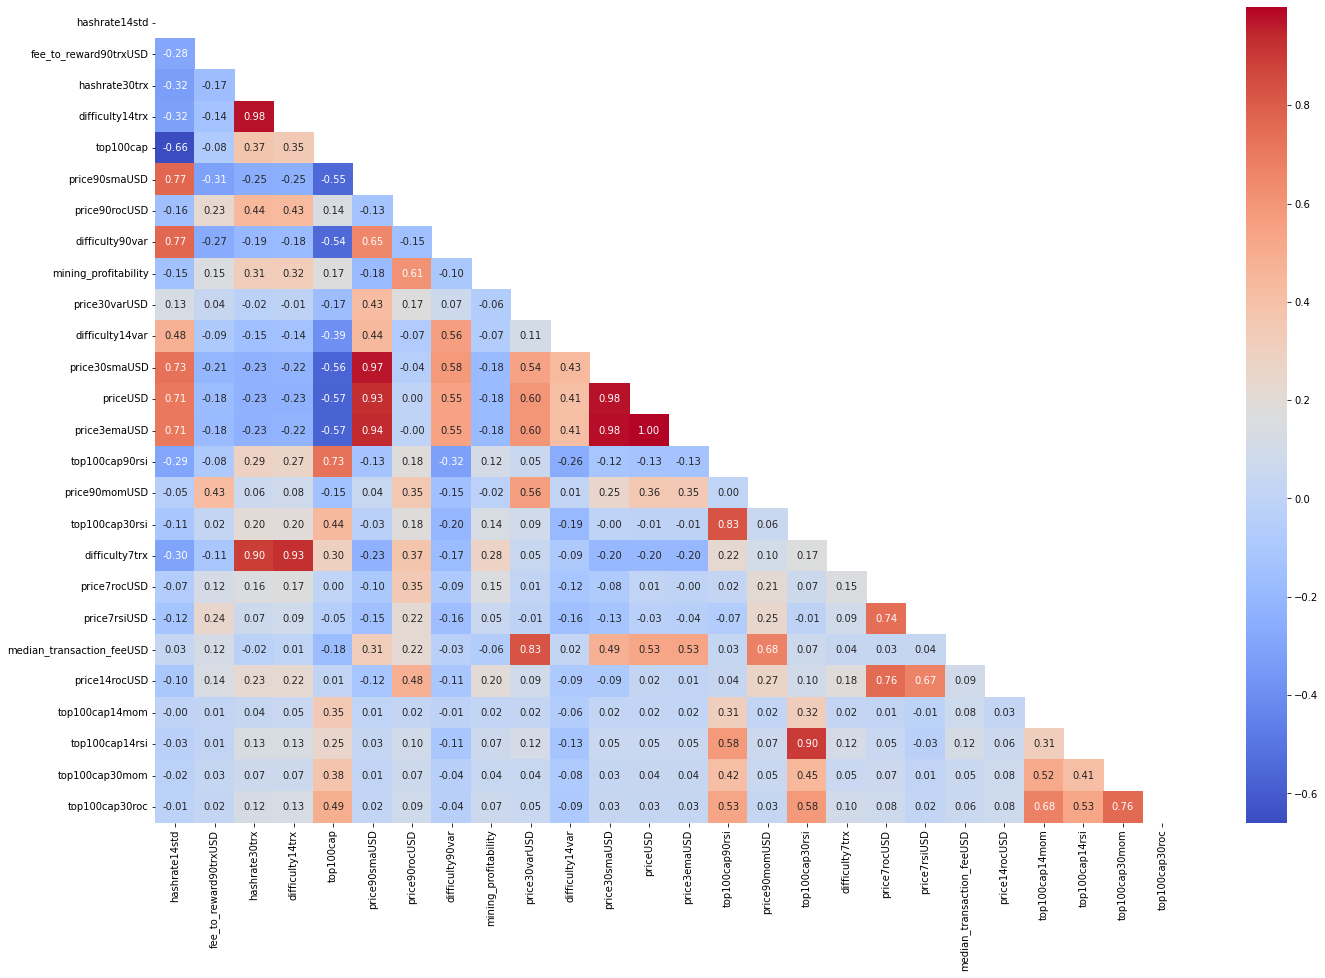

In [144]:
drop_cols_indices = [
    12, # price30stdUSD
    6, # price90wmaUSD
    33, # price3smaUSD
    27, # price14wmaUSD
    19, # price30wmaUSD
    33, # price3smaUSD
    28, # price3wmaUSD
    16, # price90emaUSD
    21, # price7wmaUSD
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 30 days

In [133]:
interval = "interval3"
period = "30"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
15            difficulty14ema            0.030403
19            difficulty14sma            0.028383
14            difficulty14wma            0.030697
11            difficulty30ema            0.033300
27            difficulty30mom            0.019235
25            difficulty30roc            0.021053
18            difficulty30sma            0.028401
6             difficulty30trx            0.043892
13            difficulty30var            0.031042
16             difficulty3ema            0.028809
21             difficulty7ema            0.026422
26             difficulty7sma            0.021007
20            difficulty90mom            0.027357
8             difficulty90var            0.040540
12            difficulty90wma            0.031489
24           fee_to_rewardUSD            0.021303
17              hashrate14trx            0.028460
22              hashrate14var            0.023104
7   median_transaction_feeUSD            0.042682
28  mediantransactionvalueUSD            0.016544
9        mining_profitability            0.038076
3   mining_profitability90trx            0.053938
5               price30wmaUSD            0.043914
23               price7rsiUSD            0.022610
1               price90emaUSD            0.055999
2               price90smaUSD            0.054288
0                    priceUSD            0.069713
4           sentinusd90stdUSD            0.051918
10                  top100cap            0.035421

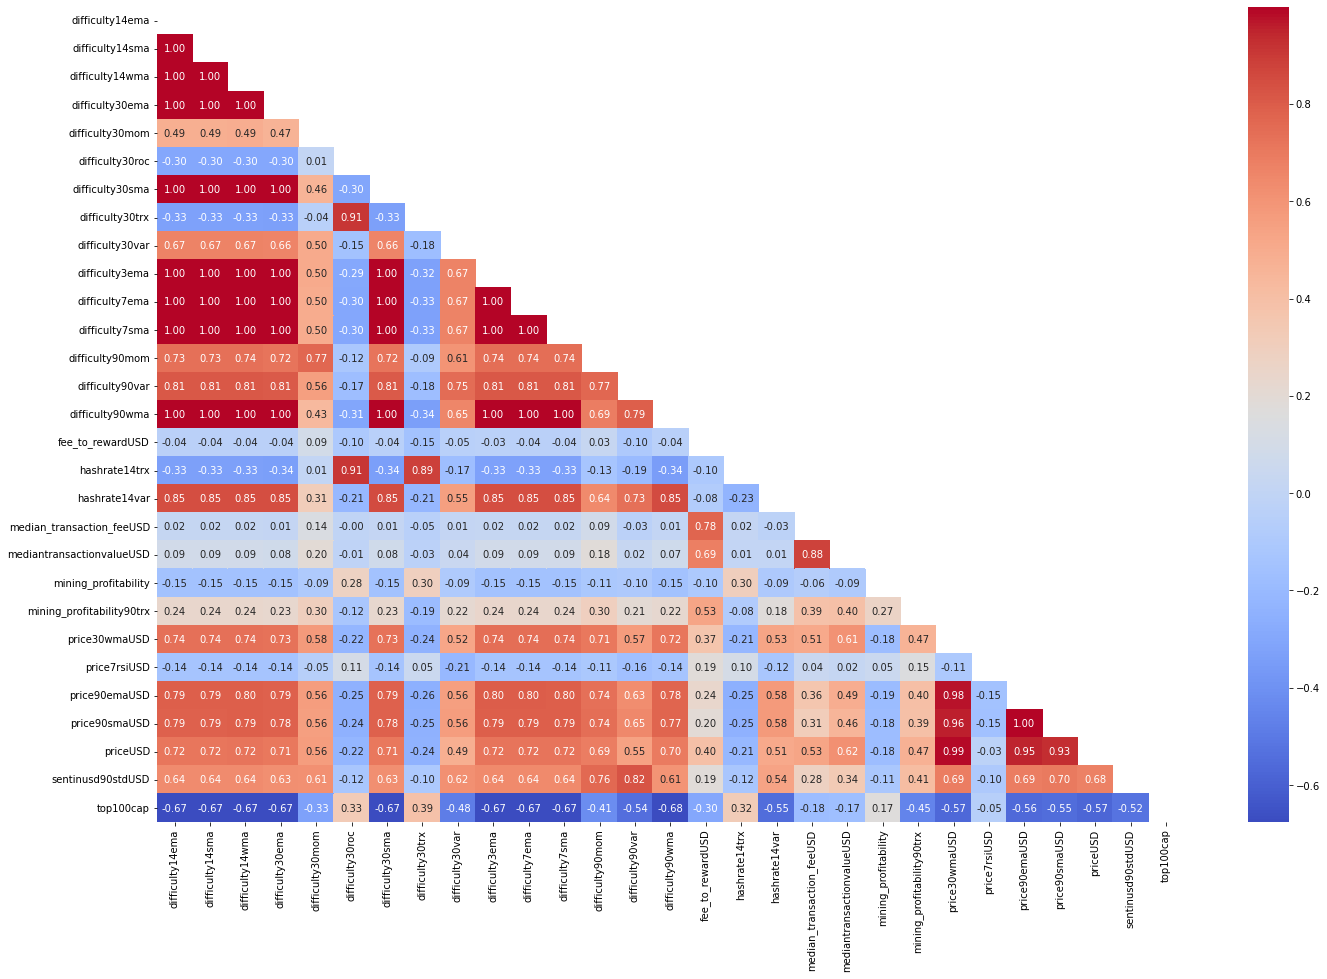

In [136]:
plot_correlation(df)


In [137]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

Remaining variables:
Index(['difficulty14ema', 'difficulty14sma', 'difficulty14wma',
       'difficulty30ema', 'difficulty30mom', 'difficulty30roc',
       'difficulty30sma', 'difficulty30trx', 'difficulty30var',
       'difficulty3ema', 'difficulty7ema', 'difficulty7sma', 'difficulty90mom',
       'difficulty90var', 'difficulty90wma', 'fee_to_rewardUSD',
       'hashrate14trx', 'hashrate14var', 'median_transaction_feeUSD',
       'mediantransactionvalueUSD', 'mining_profitability',
       'mining_profitability90trx', 'price30wmaUSD', 'price7rsiUSD',
       'price90emaUSD', 'price90smaUSD', 'priceUSD', 'sentinusd90stdUSD',
       'top100cap', 'category'],
      dtype='object')


feature  feature_importance
15            difficulty14ema            0.030403
19            difficulty14sma            0.028383
14            difficulty14wma            0.030697
11            difficulty30ema            0.033300
27            difficulty30mom            0.019235
25            difficulty30roc            0.021053
18            difficulty30sma            0.028401
6             difficulty30trx            0.043892
13            difficulty30var            0.031042
16             difficulty3ema            0.028809
21             difficulty7ema            0.026422
26             difficulty7sma            0.021007
20            difficulty90mom            0.027357
8             difficulty90var            0.040540
12            difficulty90wma            0.031489
24           fee_to_rewardUSD            0.021303
17              hashrate14trx            0.028460
22              hashrate14var            0.023104
7   median_transaction_feeUSD            0.042682
28  mediantransactionvalueUSD            0.016544
9        mining_profitability            0.038076
3   mining_profitability90trx            0.053938
5               price30wmaUSD            0.043914
23               price7rsiUSD            0.022610
1               price90emaUSD            0.055999
2               price90smaUSD            0.054288
0                    priceUSD            0.069713
4           sentinusd90stdUSD            0.051918
10                  top100cap            0.035421

0.7463064895927564


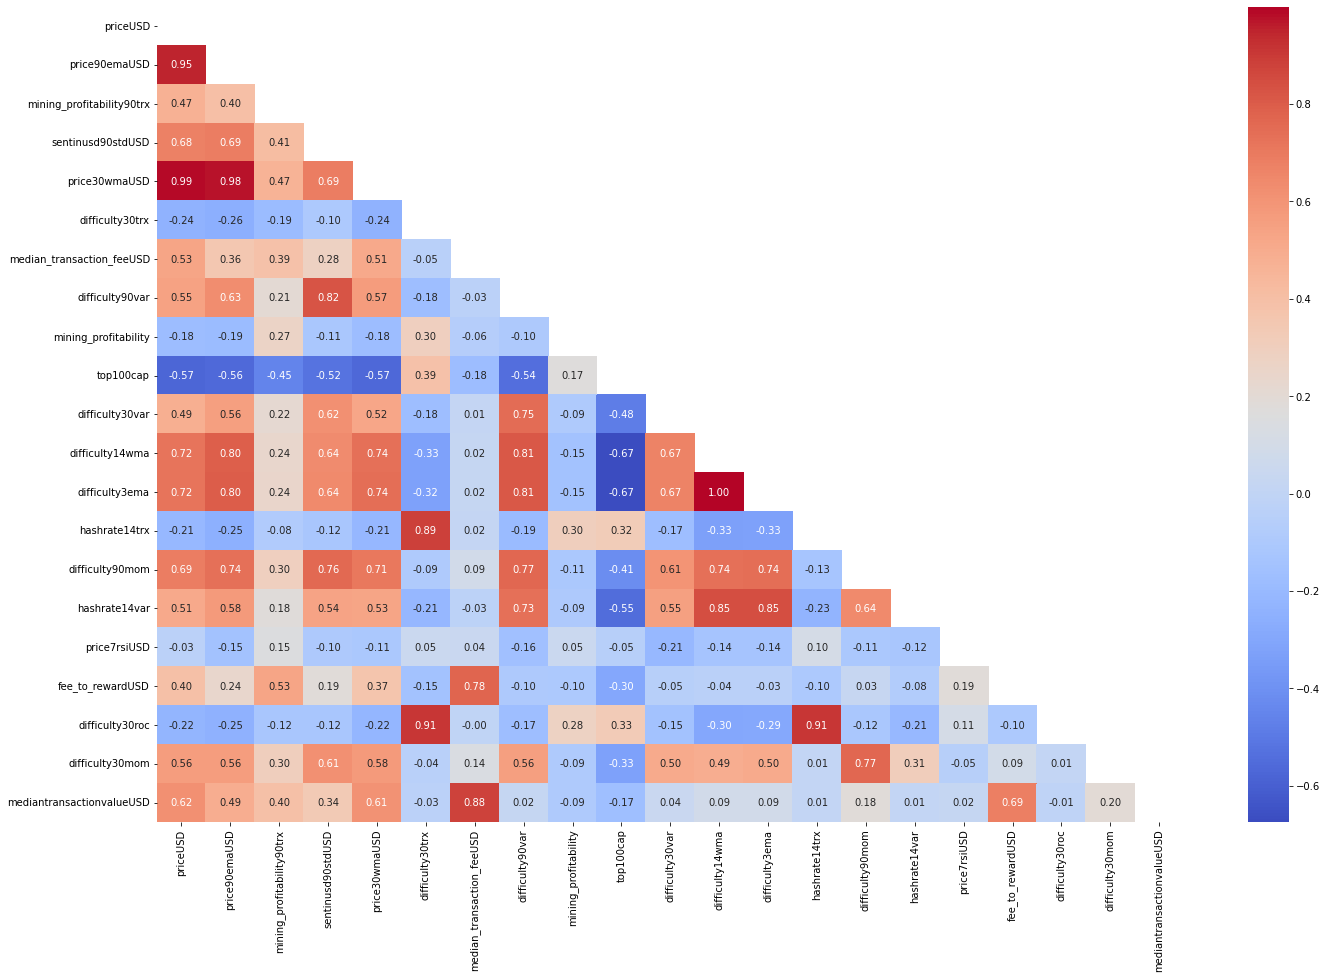

In [138]:
drop_cols_indices = [
    26, # difficulty7sma
    21, # difficulty30mom
    18, # difficulty30sma
    11, # difficulty30sma
    12, # difficulty30ema
    19, # difficulty14sma
    15, # difficulty14ema
    2, # price90smaUSD
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### 90 days

In [153]:
interval = "interval3"
period = "90"
df = pd.read_csv(f"./datasets/cls_{interval}_{period}days.csv")
imp_feat=plot_feature_importance(df)
imp_feat.sort_values(by="feature")

feature  feature_importance
7             difficulty90var            0.048494
12           fee_to_rewardUSD            0.035064
8               hashrate30var            0.044626
5        mining_profitability            0.049283
2   mining_profitability90trx            0.075576
18              price14wmaUSD            0.026438
20              price30emaUSD            0.025067
13              price30smaUSD            0.034849
17               price3emaUSD            0.028890
16               price3smaUSD            0.030313
14               price3wmaUSD            0.034832
19               price7emaUSD            0.025674
21               price7wmaUSD            0.022305
1               price90emaUSD            0.087179
0               price90smaUSD            0.101920
4               price90wmaUSD            0.056620
9                    priceUSD            0.043379
15                  top100cap            0.032605
3              top100cap30trx            0.064960
6              top100cap90mom            0.048587
10             top100cap90roc            0.042956
11             top100cap90rsi            0.040382

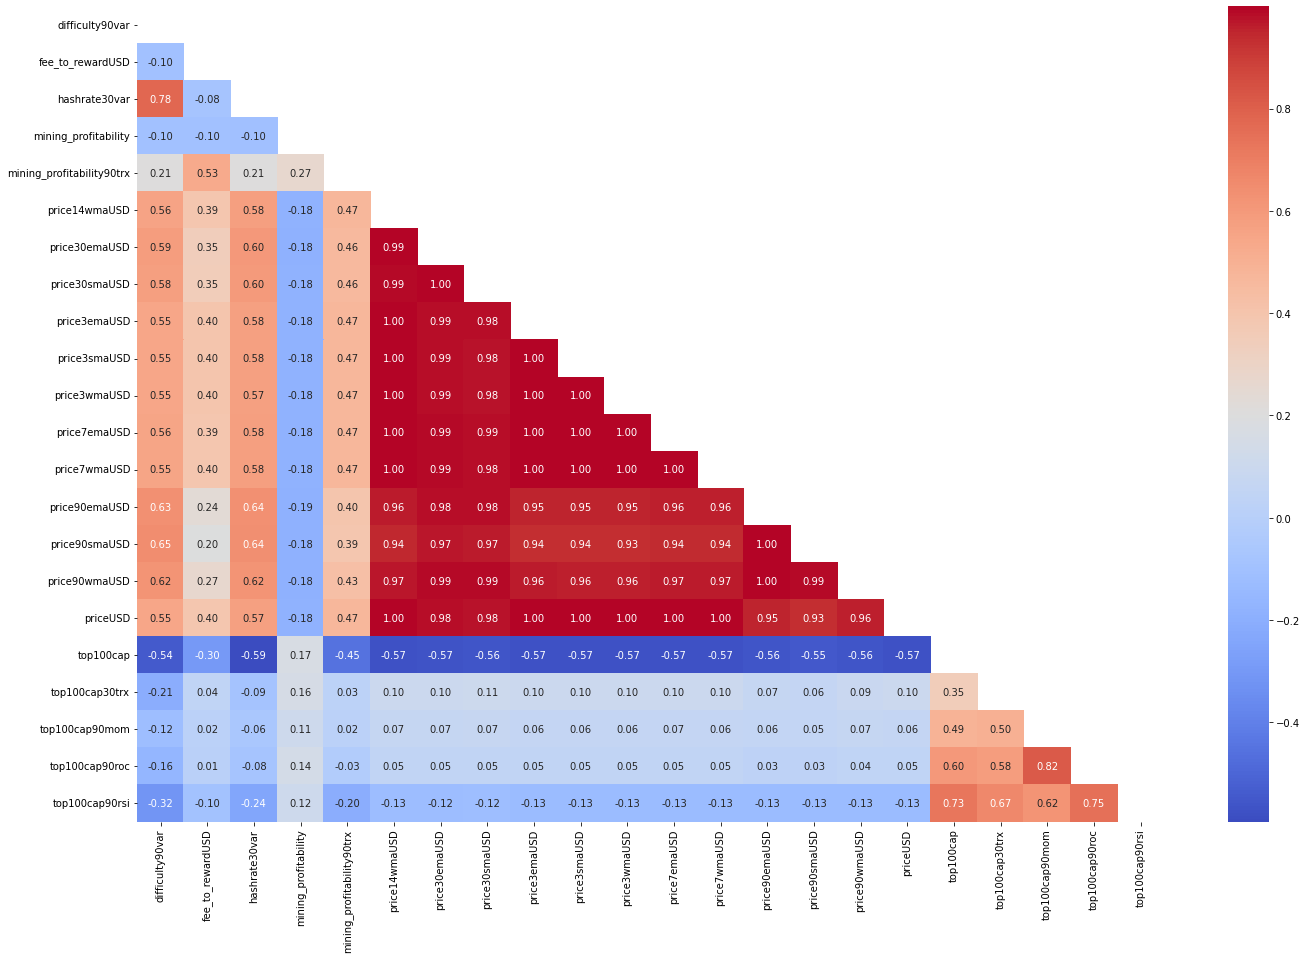

In [154]:
plot_correlation(df)


In [158]:
low_vif_df=cmns.drop_high_vif(df,thresh=5)
cmns.vif_values(low_vif_df)
imp_feat=plot_feature_importance(low_vif_df)
imp_feat.sort_values(by="feature")

Remaining variables:
Index(['difficulty90var', 'fee_to_rewardUSD', 'hashrate30var',
       'mining_profitability', 'mining_profitability90trx', 'price14wmaUSD',
       'price30emaUSD', 'price30smaUSD', 'price3emaUSD', 'price3smaUSD',
       'price3wmaUSD', 'price7emaUSD', 'price7wmaUSD', 'price90emaUSD',
       'price90smaUSD', 'price90wmaUSD', 'priceUSD', 'top100cap',
       'top100cap30trx', 'top100cap90mom', 'top100cap90roc', 'top100cap90rsi',
       'category'],
      dtype='object')


feature  feature_importance
7             difficulty90var            0.048494
12           fee_to_rewardUSD            0.035064
8               hashrate30var            0.044626
5        mining_profitability            0.049283
2   mining_profitability90trx            0.075576
18              price14wmaUSD            0.026438
20              price30emaUSD            0.025067
13              price30smaUSD            0.034849
17               price3emaUSD            0.028890
16               price3smaUSD            0.030313
14               price3wmaUSD            0.034832
19               price7emaUSD            0.025674
21               price7wmaUSD            0.022305
1               price90emaUSD            0.087179
0               price90smaUSD            0.101920
4               price90wmaUSD            0.056620
9                    priceUSD            0.043379
15                  top100cap            0.032605
3              top100cap30trx            0.064960
6              top100cap90mom            0.048587
10             top100cap90roc            0.042956
11             top100cap90rsi            0.040382

0.679807680321154


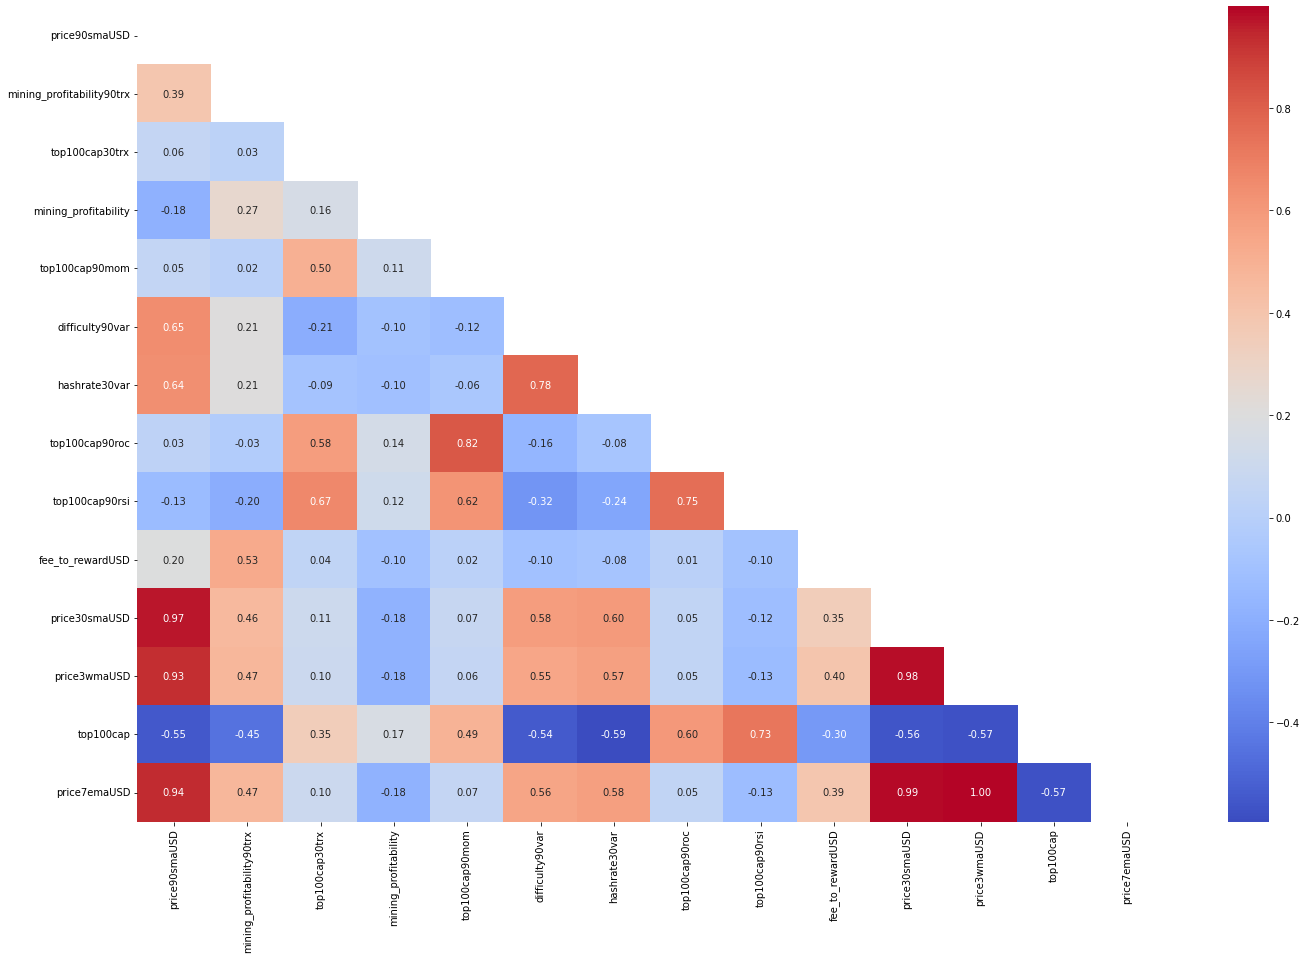

In [159]:
drop_cols_indices = [
    1, # price90emaUSD
    9, # priceUSD
    4, # price90wmaUSD
    17, # price3emaUSD
    20, # price30emaUSD
    16, # price3smaUSD
    21, # price7wmaUSD
    18, # price14wmaUSD
    ]
selected_cols=imp_feat.drop(drop_cols_indices,axis=0)
df_sel =  low_vif_df[[*selected_cols.feature, 'category']]
final_datasets[interval][period] = df_sel
print(selected_cols.feature_importance.sum())
plot_correlation(df_sel)

### Save

In [160]:
for period, df in final_datasets[interval].items():
    df.to_csv(f'manual_selected_datasets/cls_{interval}_{period}days.csv',sep=',',index=False)